Сборник всех методов аппроксимации облака точек кривыми второго порядка

In [1]:
import numpy as np
from scipy.linalg import svd
from scipy.linalg import eigh
import matplotlib.pyplot as plt
from numpy import arange
from numpy import meshgrid
from numpy.random import default_rng
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

In [2]:
# функция рисования по вектору параметров

def print_conic(params, data, x_min, x_max, y_min, y_max):
    plt.figure(figsize=(20, 20))
    delta = 0.025
    xrange = arange(x_min, x_max, delta)
    yrange = arange(y_min, y_max, delta)
    X, Y = meshgrid(xrange, yrange)
    x, y = data.T
    plt.scatter(x,y)


    F = params[5] + params[3]*X + params[4]*Y + params[0]*X**2 + params[1]*X*Y + params[2]*Y**2
    G = 0
    plt.contour(X, Y, F - G, [0])
    plt.grid(True)
    plt.show()
    
def conic_func(params, data):
    sum = 0
    for i in range(len(data)):
        sum += (params[5] + params[3]*data[i][0] + params[4]*data[i][1] + params[0]*data[i][0]**2 + params[1]*data[i][0]*data[i][1] + params[2]*data[i][1]**2)**2
    return sum

def grad_conic(params, point):
    return np.array([
        [2*params[0]*point[0]+ params[1]*point[1]+params[3]],
        [2*params[2]*point[1]+ params[1]*point[0]+params[4]]
    ])

def sampson_dist(params, data):
    sum = 0
    for i in range(len(data)):
        grad = grad_conic(params, data[i])
        sum += (params[5] + params[3]*data[i][0] + params[4]*data[i][1] + params[0]*data[i][0]**2 + params[1]*data[i][0]*data[i][1] + params[2]*data[i][1]**2)**2/(grad[0]**2 + grad[1]**2)
    return sum

In [3]:
# окно для дата-сета


# выбираем между кониками

# эллипс
file_handle = open('/Users/valeriy/Documents/octonus/r/ellipse.txt', 'r')


lines_list = file_handle.readlines()
ellipse = []
ellipse_negative = []
ellipse_positive = []
ellipse_upper = []
ellipse_downer = []

for i in range(1, len(lines_list)):
    line = lines_list[i]
    while True:
        try:
            col, row = (float(val) for val in line.split())
            ellipse.append([col, row])
            break
        except ValueError:
            break
    
    
ellipse = np.array(ellipse)
for point in ellipse:
    if point[0] < -0:
        ellipse_negative.append(point)
    else:
        ellipse_positive.append(point)
    if point[1] < 5:
        ellipse_downer.append(point)
    else:
        ellipse_upper.append(point)
        
ellipse_negative = np.array(ellipse_negative)
ellipse_positive = np.array(ellipse_positive)
ellipse_downer = np.array(ellipse_downer)
ellipse_upper = np.array(ellipse_upper)

############################################


# гипербола
file_handle = open('/Users/valeriy/Documents/octonus/r/hyperbola.txt', 'r')


lines_list = file_handle.readlines()
hyperbola = []
hyperbola_negative = []
hyperbola_positive = []
hyperbola_upper = []
hyperbola_downer = []

for i in range(1, len(lines_list)):
    line = lines_list[i]
    while True:
        try:
            col, row = (float(val) for val in line.split())
            hyperbola.append([col, row])
            break
        except ValueError:
            break
    
    
hyperbola = np.array(hyperbola)
for point in hyperbola:
    if point[0] < -0:
        hyperbola_negative.append(point)
    else:
        hyperbola_positive.append(point)
    if point[1] > 10 and point[0] > 0:
        hyperbola_upper.append(point)
    else:
        hyperbola_downer.append(point)
        
hyperbola_negative = np.array(hyperbola_negative)
hyperbola_positive = np.array(hyperbola_positive)
hyperbola_downer = np.array(hyperbola_downer)
hyperbola_upper = np.array(hyperbola_upper)

############################################


# парабола
file_handle = open('/Users/valeriy/Documents/octonus/r/parabola.txt', 'r')


lines_list = file_handle.readlines()
parabola = []
parabola_negative = []
parabola_positive = []
parabola_upper = []
parabola_downer = []

for i in range(1, len(lines_list)):
    line = lines_list[i]
    while True:
        try:
            col, row = (float(val) for val in line.split())
            parabola.append([col, row])
            break
        except ValueError:
            break
    
    
parabola = np.array(parabola)
for point in parabola:
    if point[0] < -0:
        parabola_negative.append(point)
    else:
        parabola_positive.append(point)
    if point[1] < -2 and point[0] > 2.5:
        parabola_upper.append(point)
    else:
        parabola_downer.append(point)
        
parabola_negative = np.array(parabola_negative)
parabola_positive = np.array(parabola_positive)
parabola_downer = np.array(parabola_downer)
parabola_upper = np.array(parabola_upper)

############################################


# прямая
file_handle = open('/Users/valeriy/Documents/octonus/r/line.txt', 'r')


lines_list = file_handle.readlines()
line = []
line_negative = []
line_positive = []
line_upper = []
line_downer = []

for i in range(1, len(lines_list)):
    lines = lines_list[i]
    while True:
        try:
            col, row = (float(val) for val in lines.split())
            line.append([col, row])
            break
        except ValueError:
            break
    
    
line = np.array(line)
for point in line:
    if point[0] < -0:
        line_negative.append(point)
    else:
        line_positive.append(point)
    if point[1] < -2:
        line_upper.append(point)
    else:
        line_downer.append(point)
        
line_negative = np.array(line_negative)
line_positive = np.array(line_positive)
line_downer = np.array(line_downer)
line_upper = np.array(line_upper)


###################################

# окружность


rng = default_rng()
def gen_data(t, a, b, c, noise=0., n_outliers=0, seed=None):
    rng = default_rng(seed)

    y = a + np.sqrt(c**2 - t**2)
    #y = a + (c*t)**2
    error = noise * rng.standard_normal(t.size)
    outliers = rng.integers(0, t.size, n_outliers)
    error[outliers] *= 10

    return y + error

a = 1
b = 2.0
c = 2
t_min = 0
t_max = 2
n_points = 30
t_train = np.linspace(t_min, t_max, n_points)
y_train = gen_data(t_train, a, b, c, noise=0.01, n_outliers=50)
circle = []
for i in range(n_points):
    circle.append([t_train[i], y_train[i]])
    
circle = np.array(circle)

1. Простейший алгебраический метод

In [4]:
def alg_lin_method(data):
    matrix_monomials = np.array([
        [x*x, x*y, y*y, x, y, 1]
        for (x,y) in data])
    M = np.matmul(matrix_monomials.T, matrix_monomials)
    sum = 0
    vector = svd(M)[2][5]
    for elem in svd(M)[2][5]:
        sum += elem*elem
    vector /= np.sqrt(sum)
    return vector

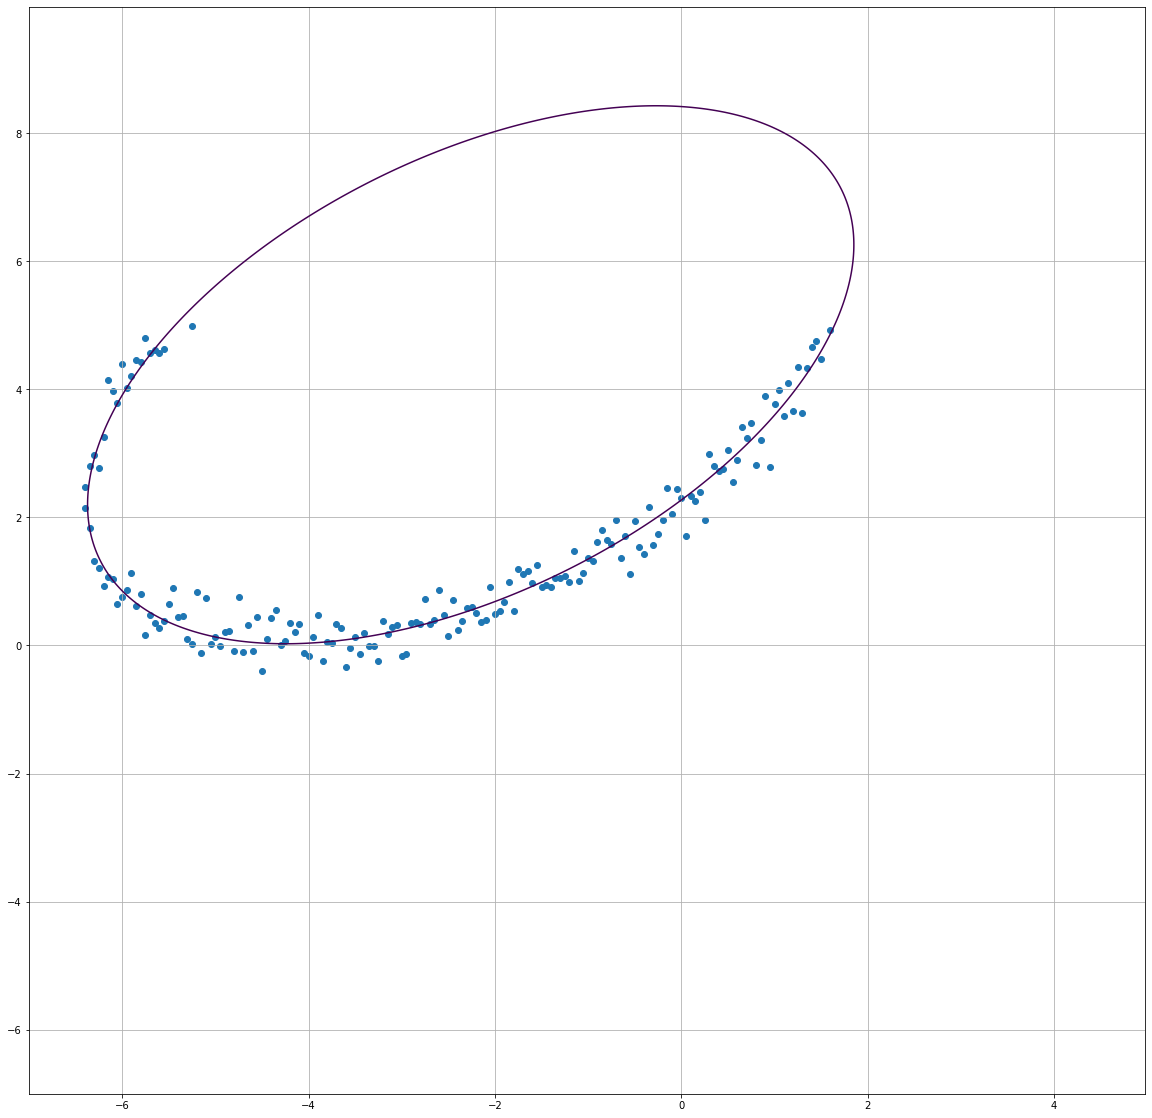

In [8]:
# четверть эллипса

alg_lin_result = alg_lin_method(ellipse_downer)
print_conic(alg_lin_result, ellipse_downer, -7., 5., -7., 10.)

/var/folders/64/8wd7l9zd709fzvrfc3z9pzdr0000gn/T/ipykernel_18475/2184950280.py:15: UserWarning: No contour levels were found within the data range.
  plt.contour(X, Y, F - G, [0])


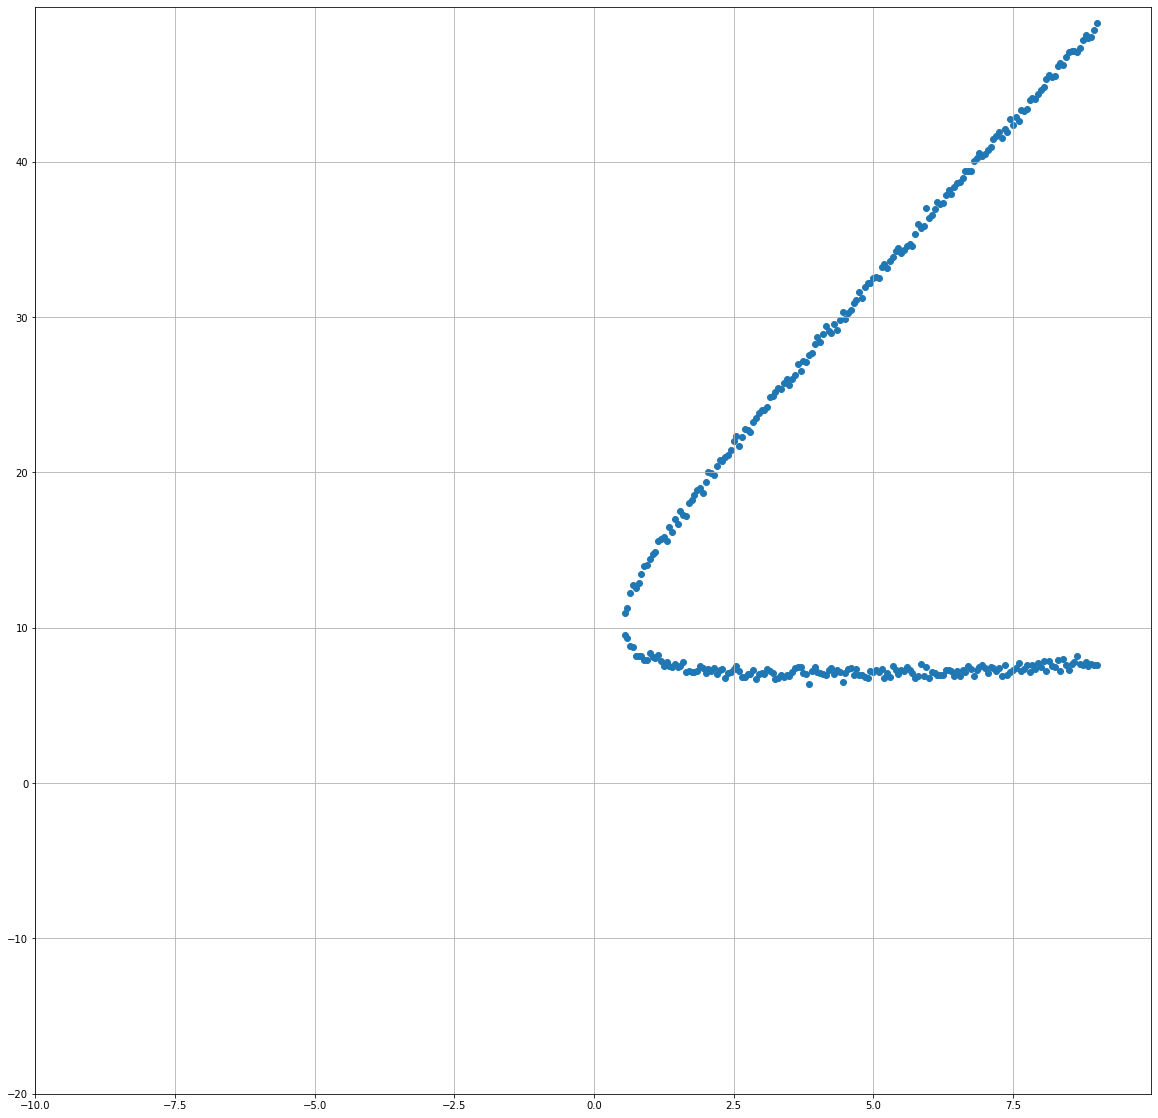

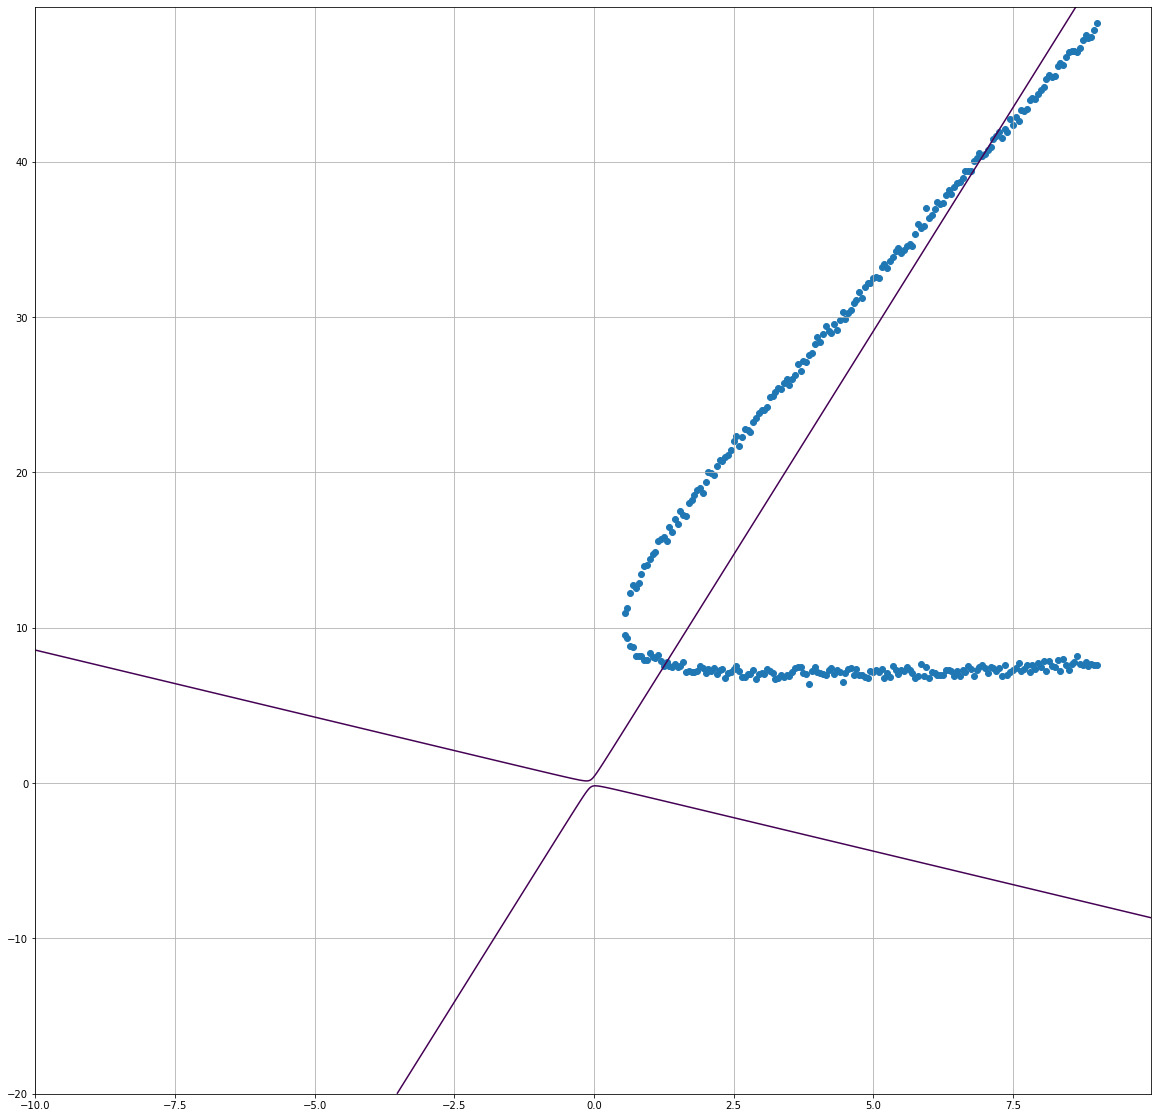

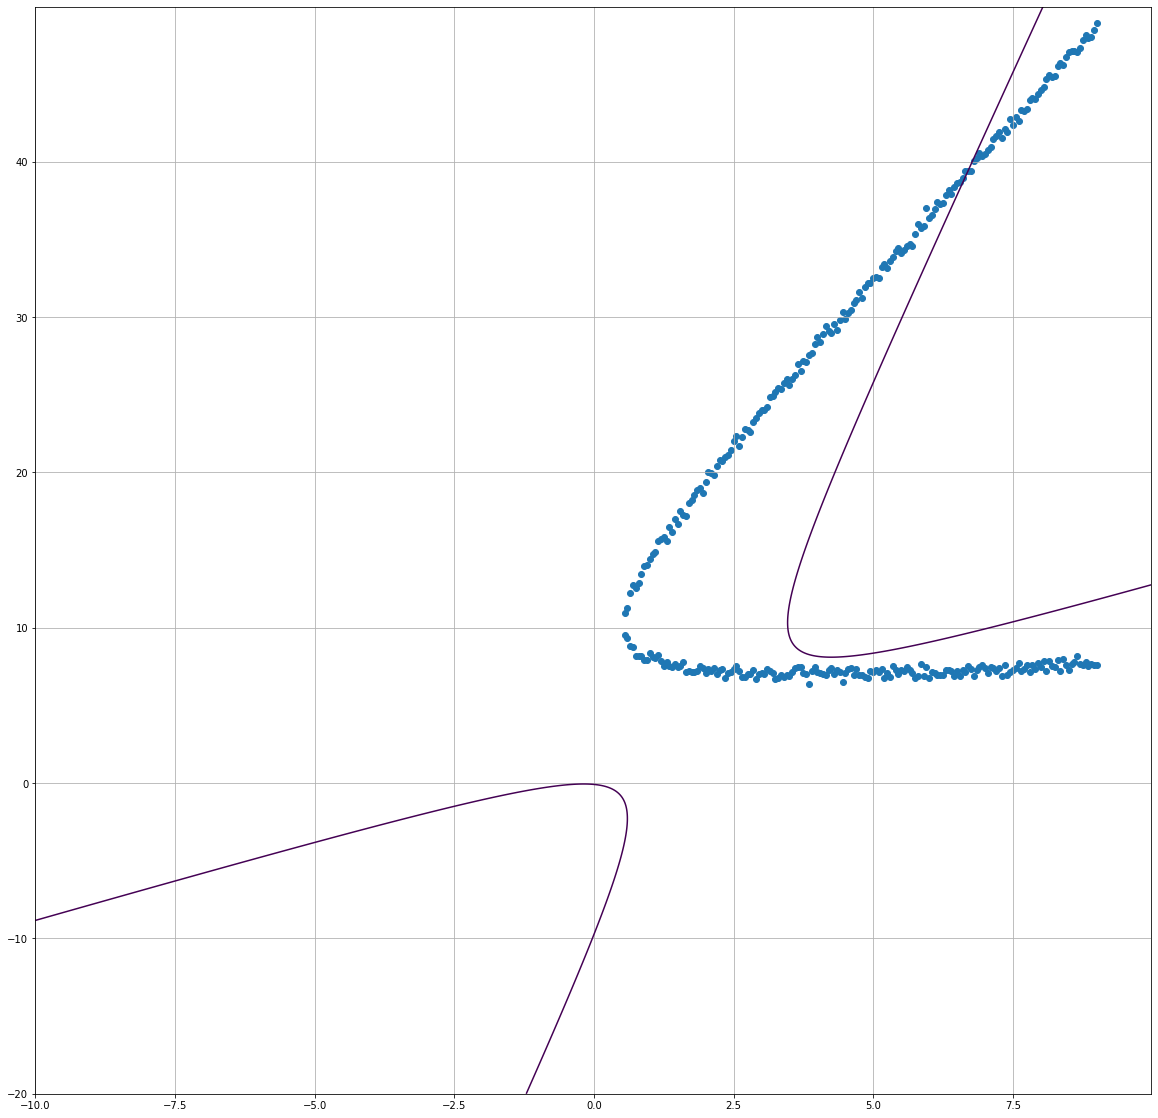

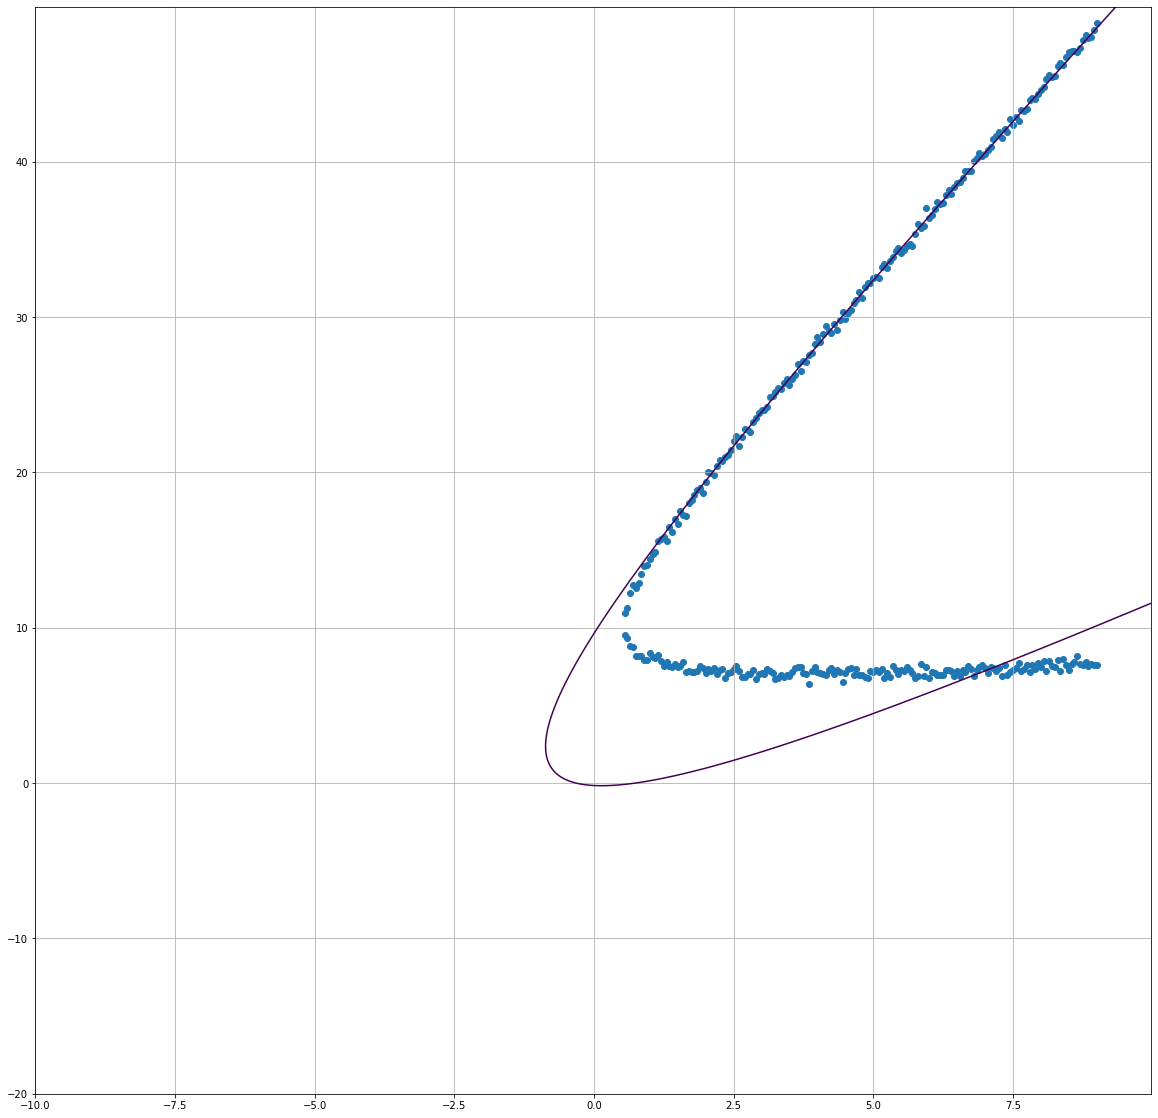

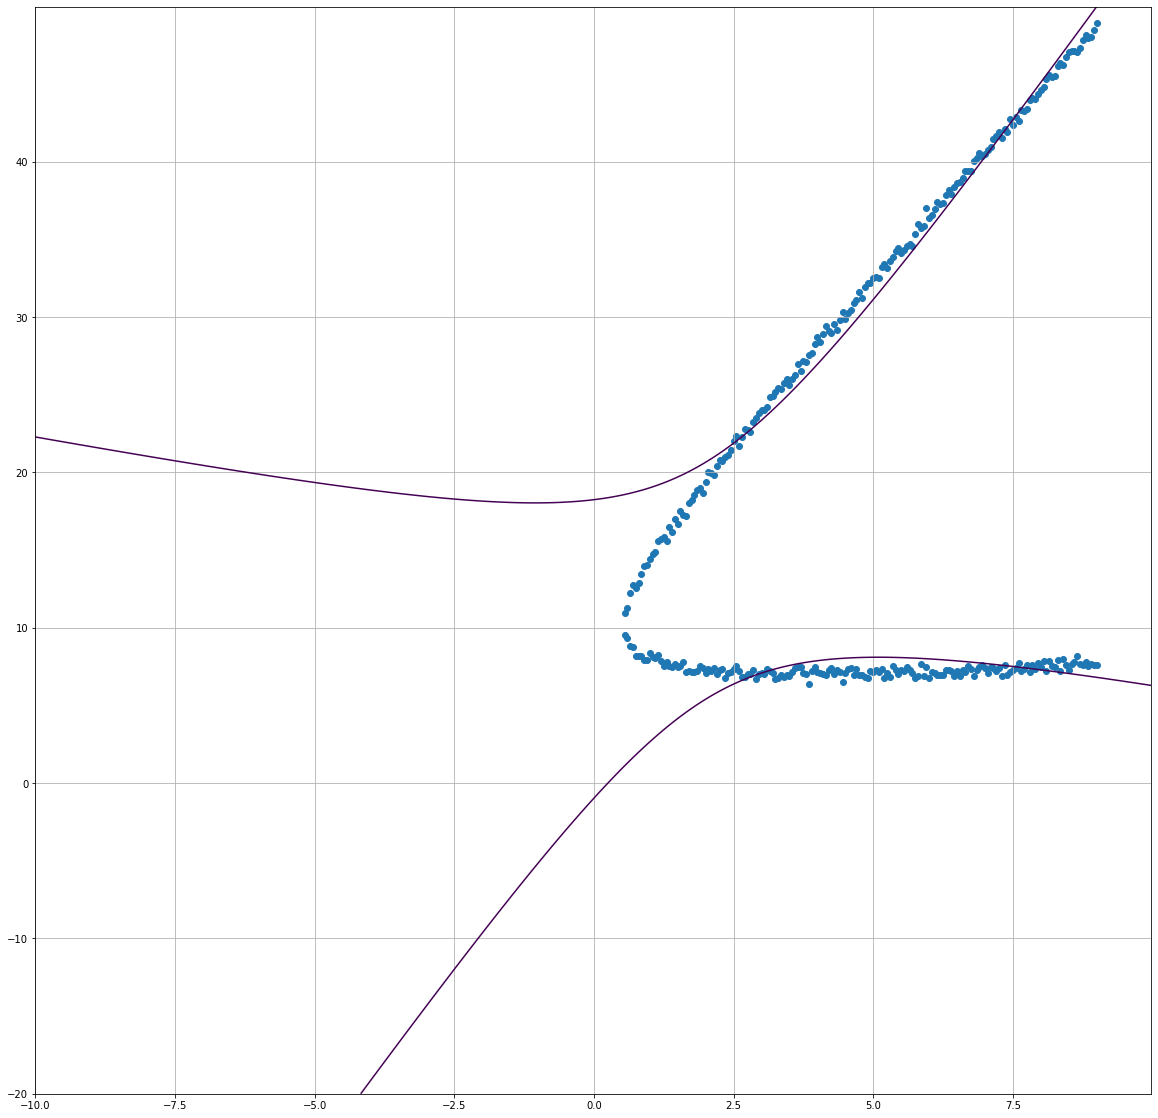

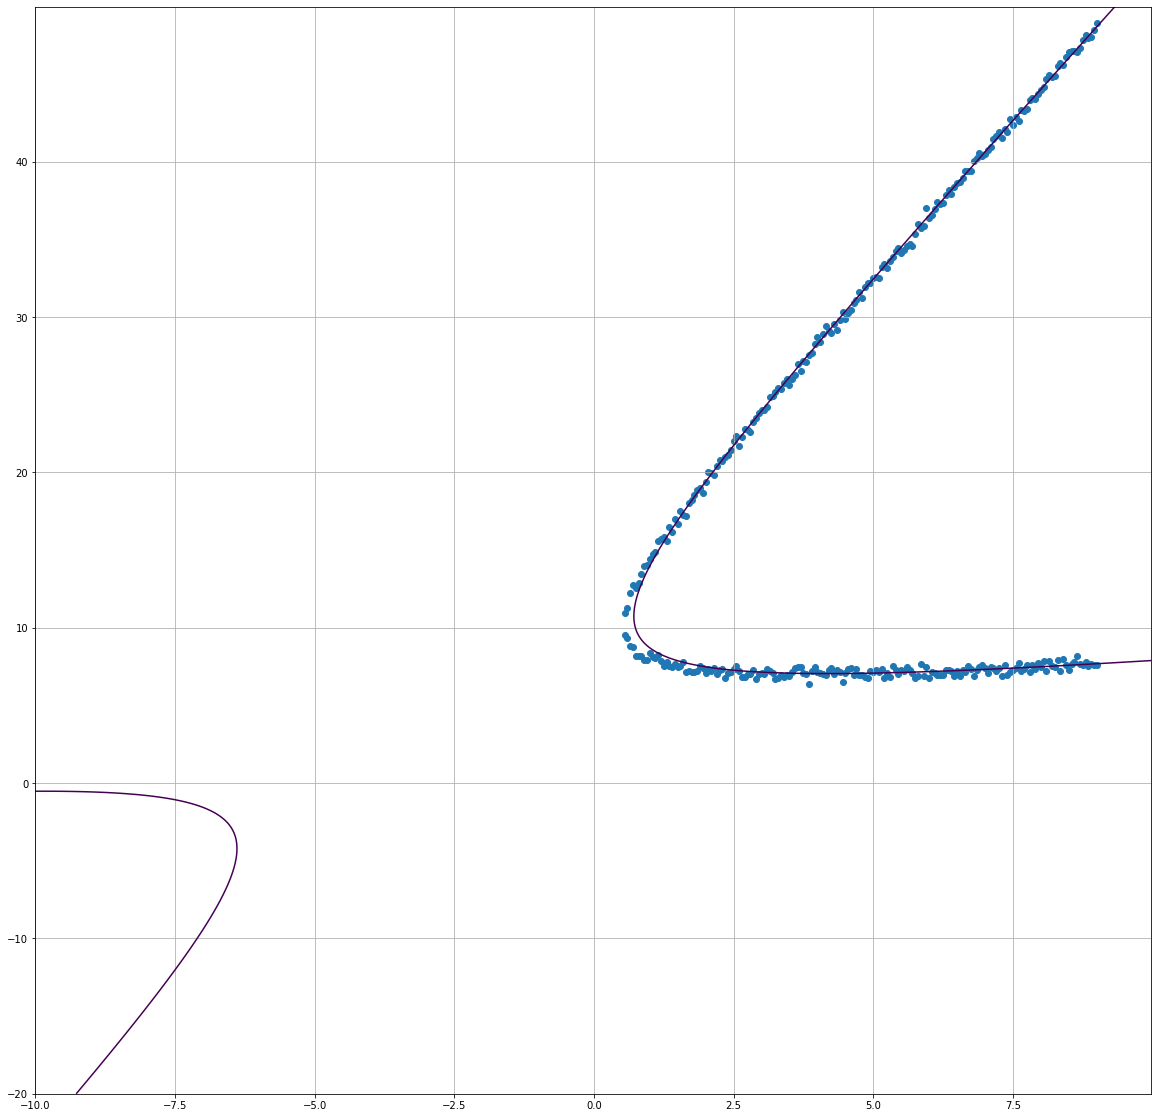

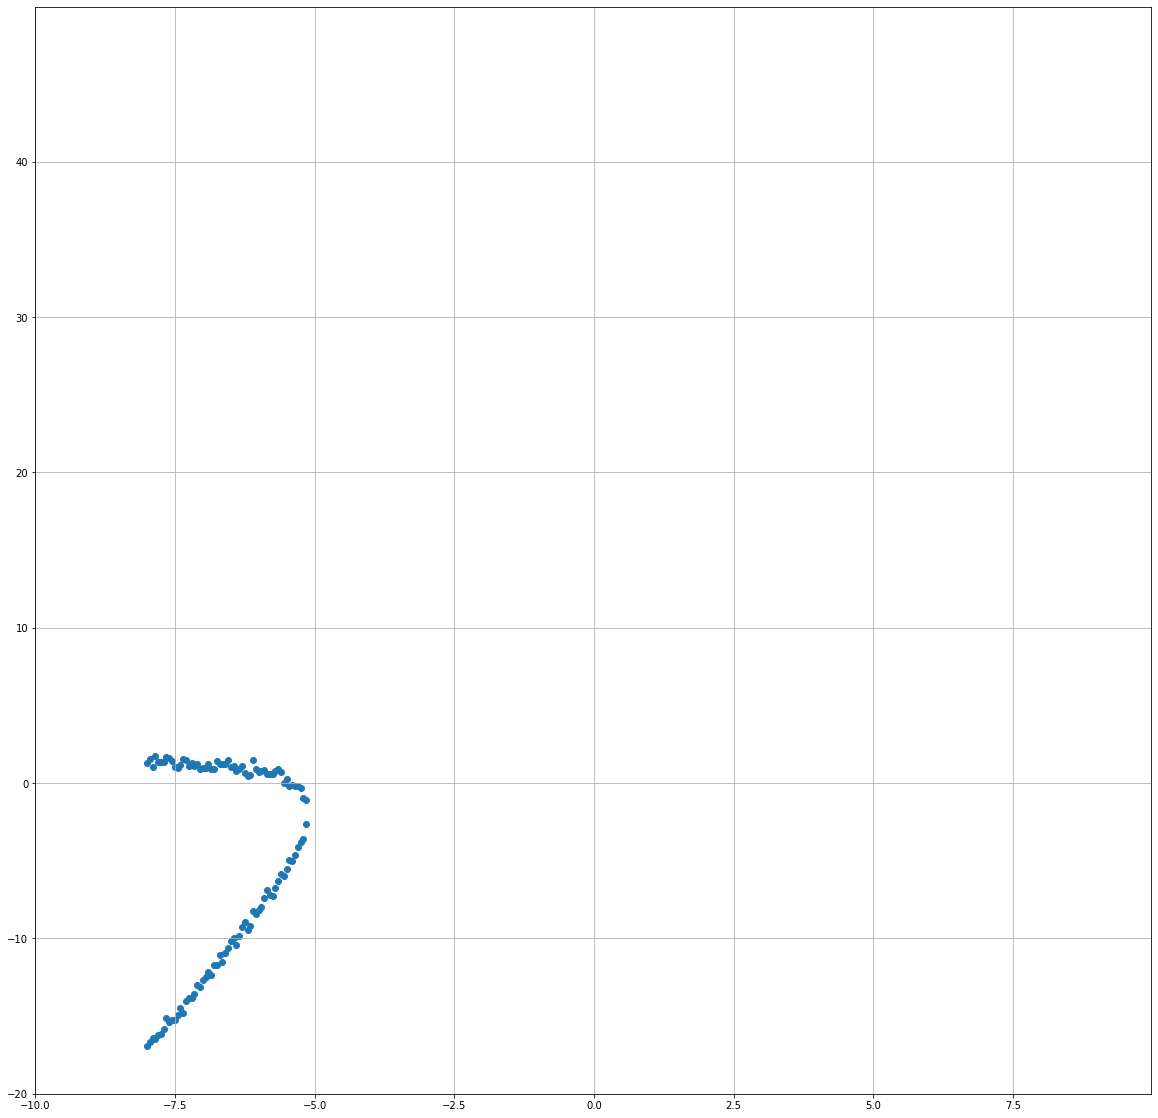

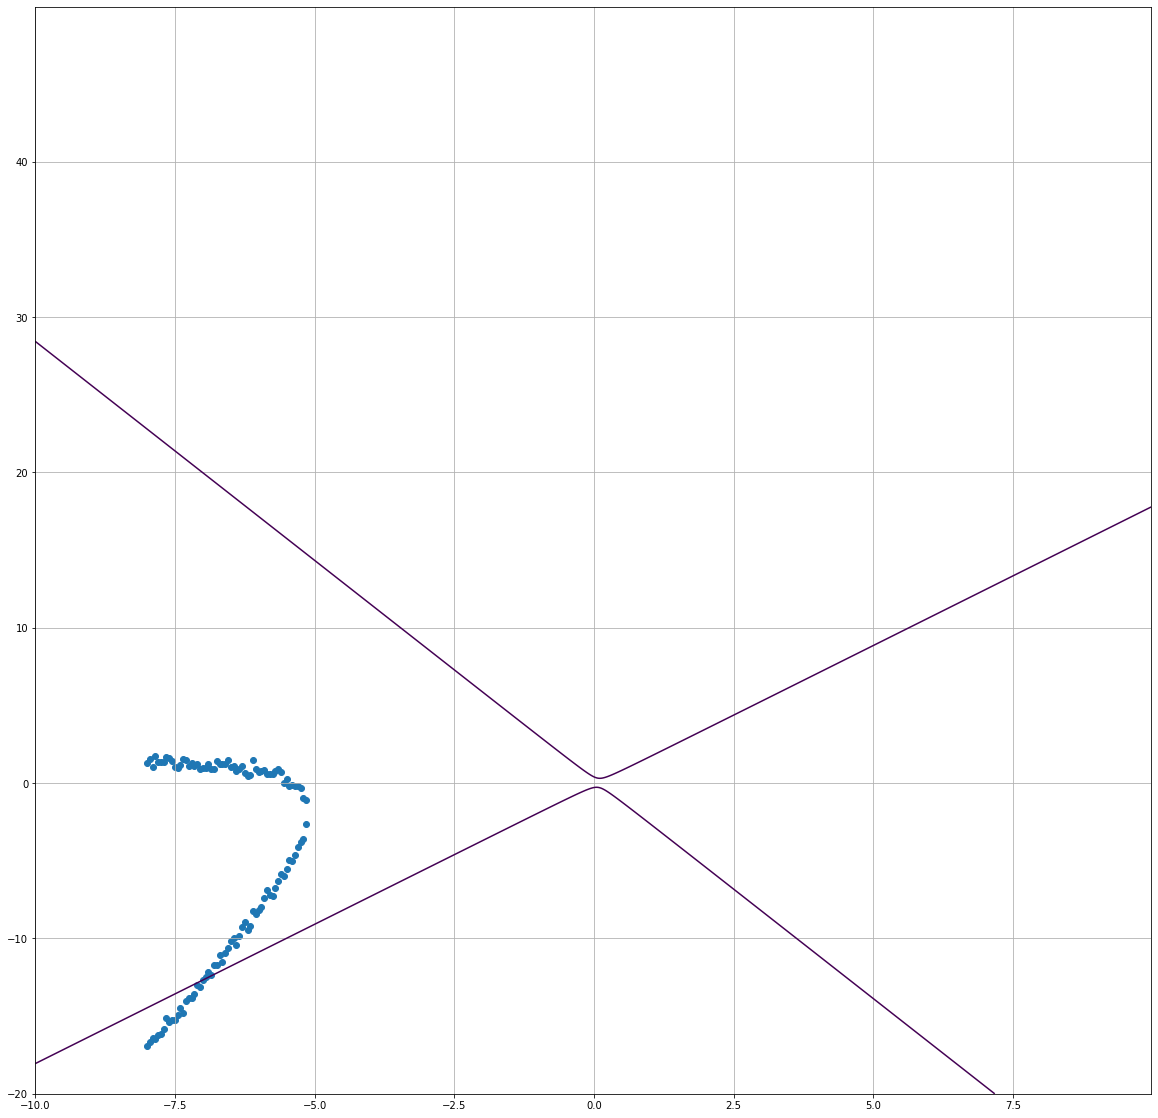

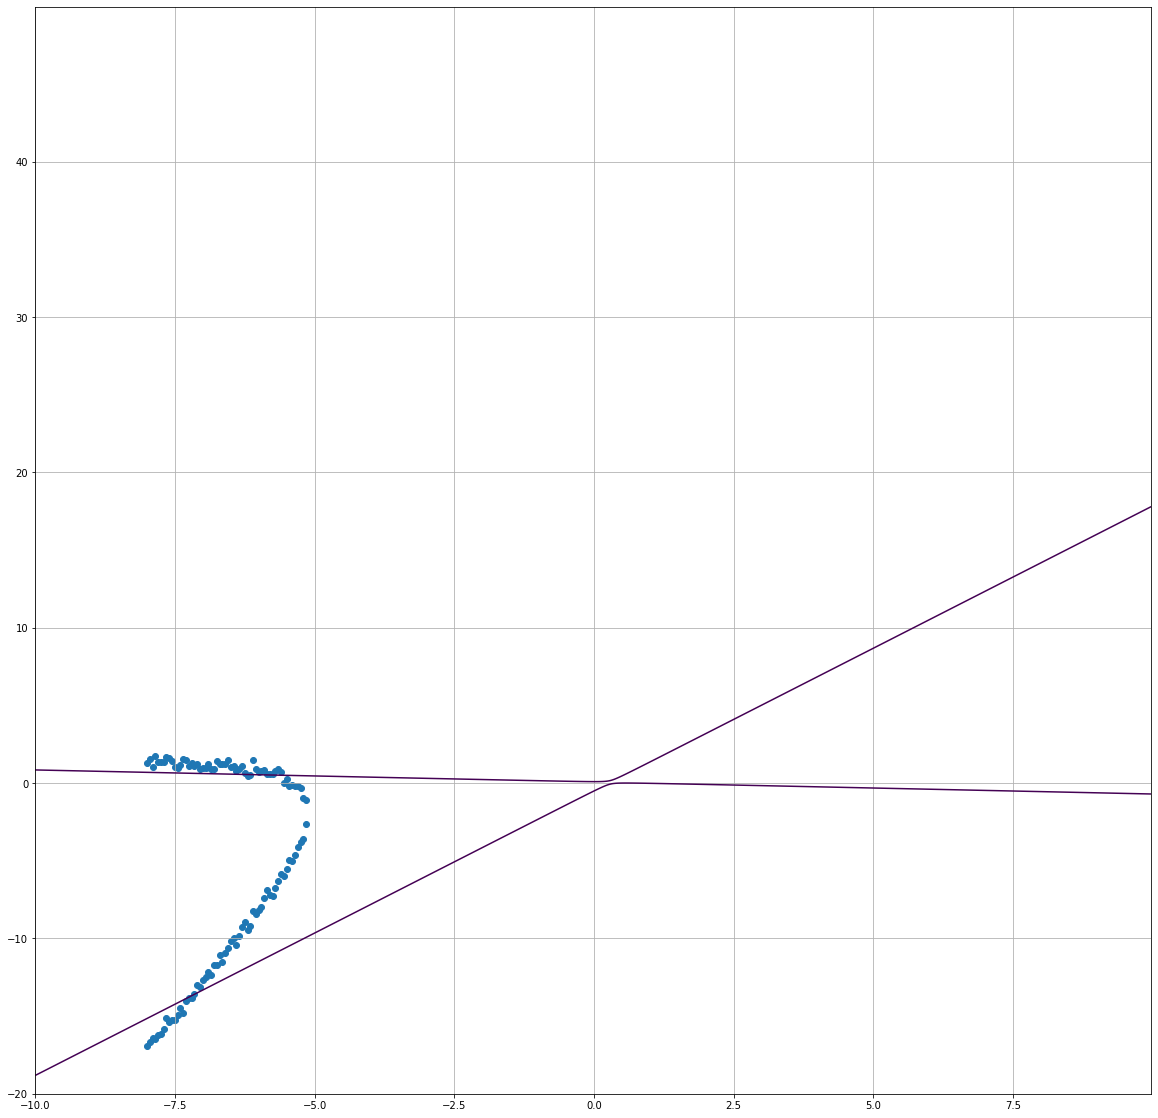

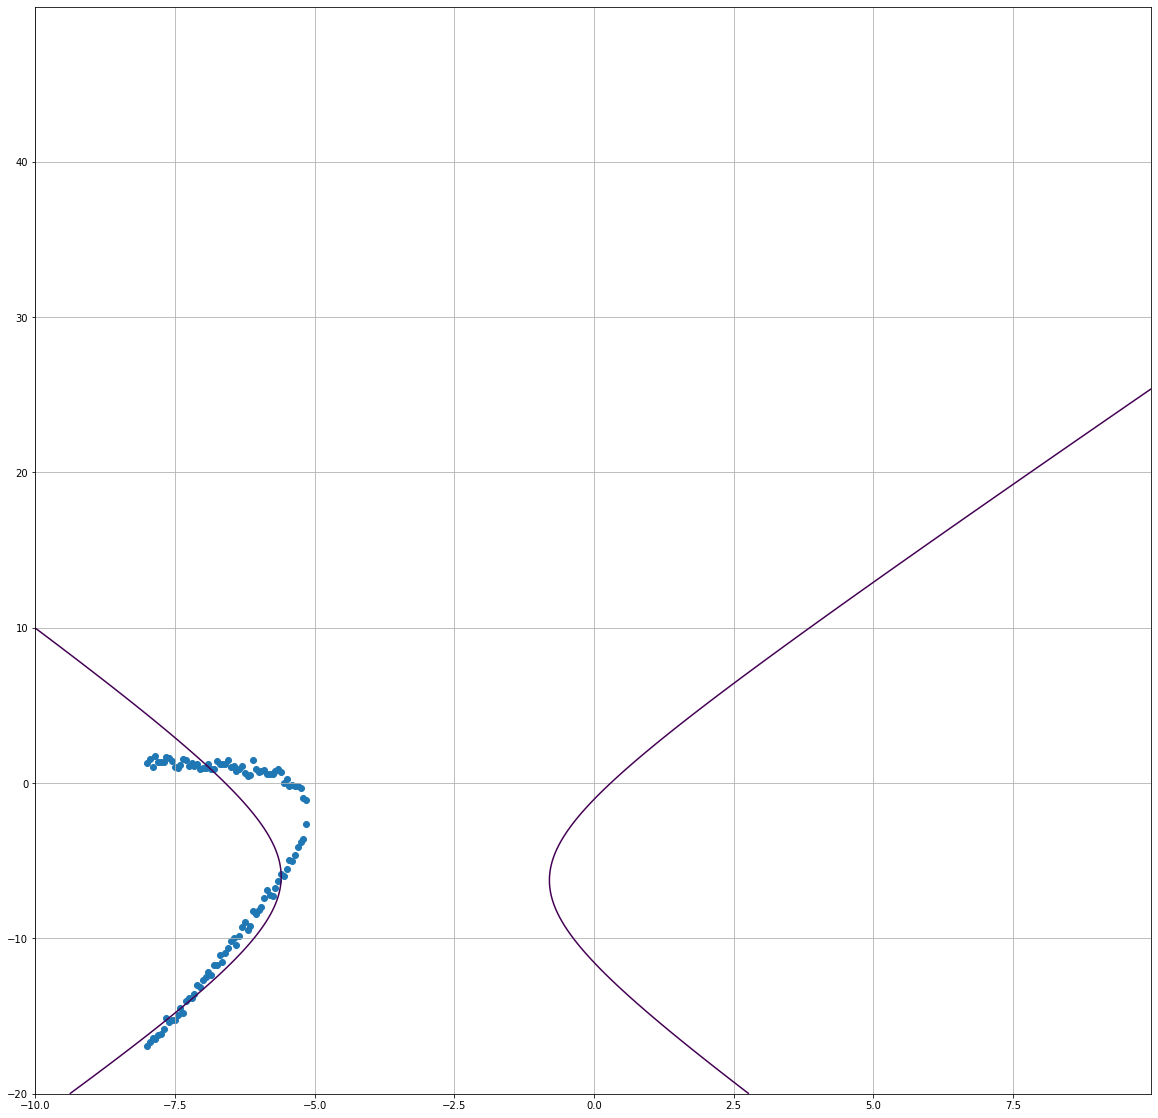

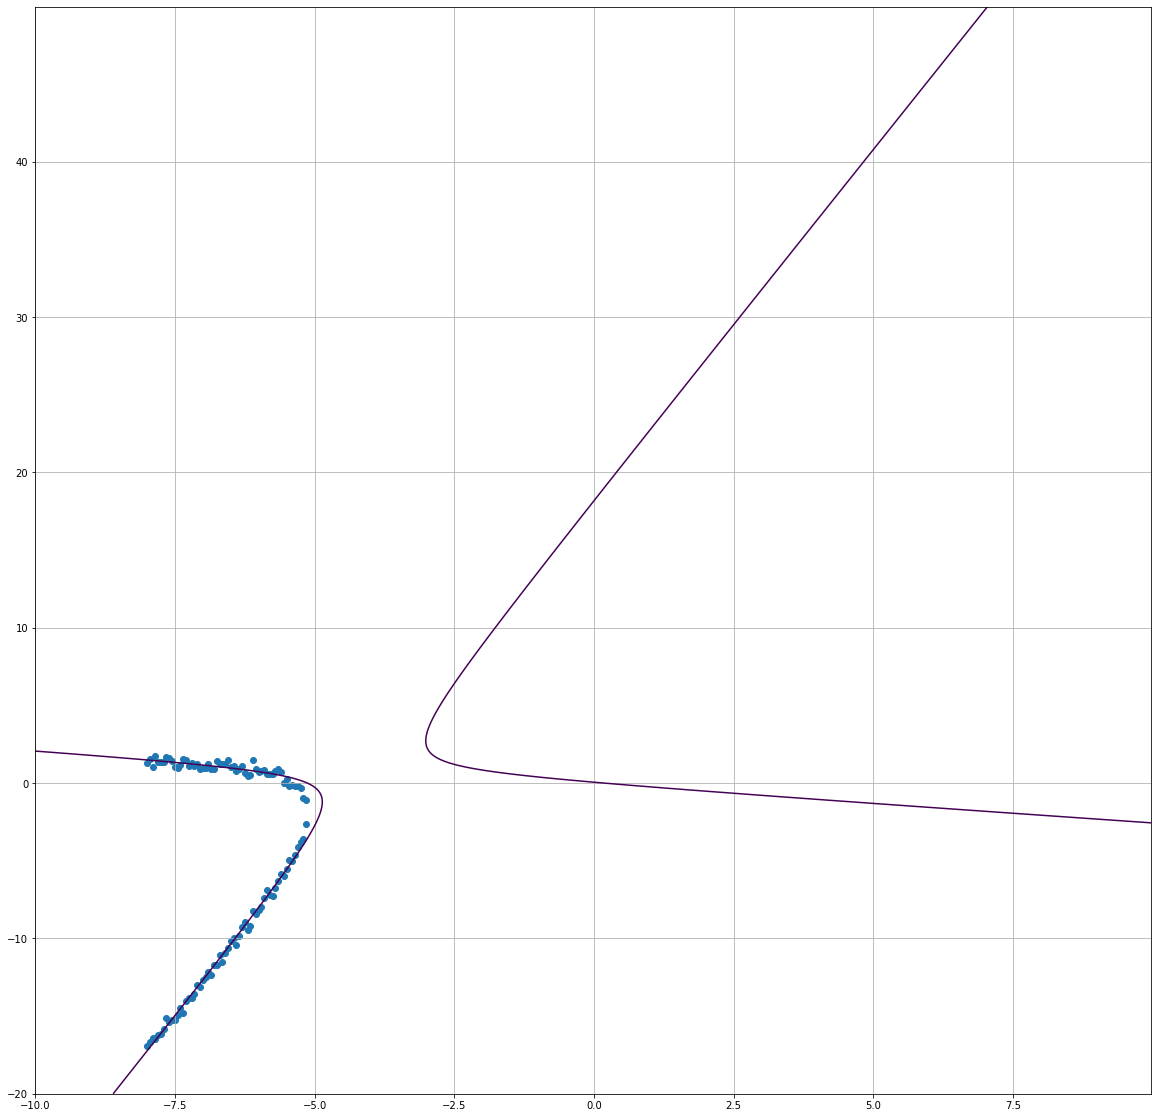

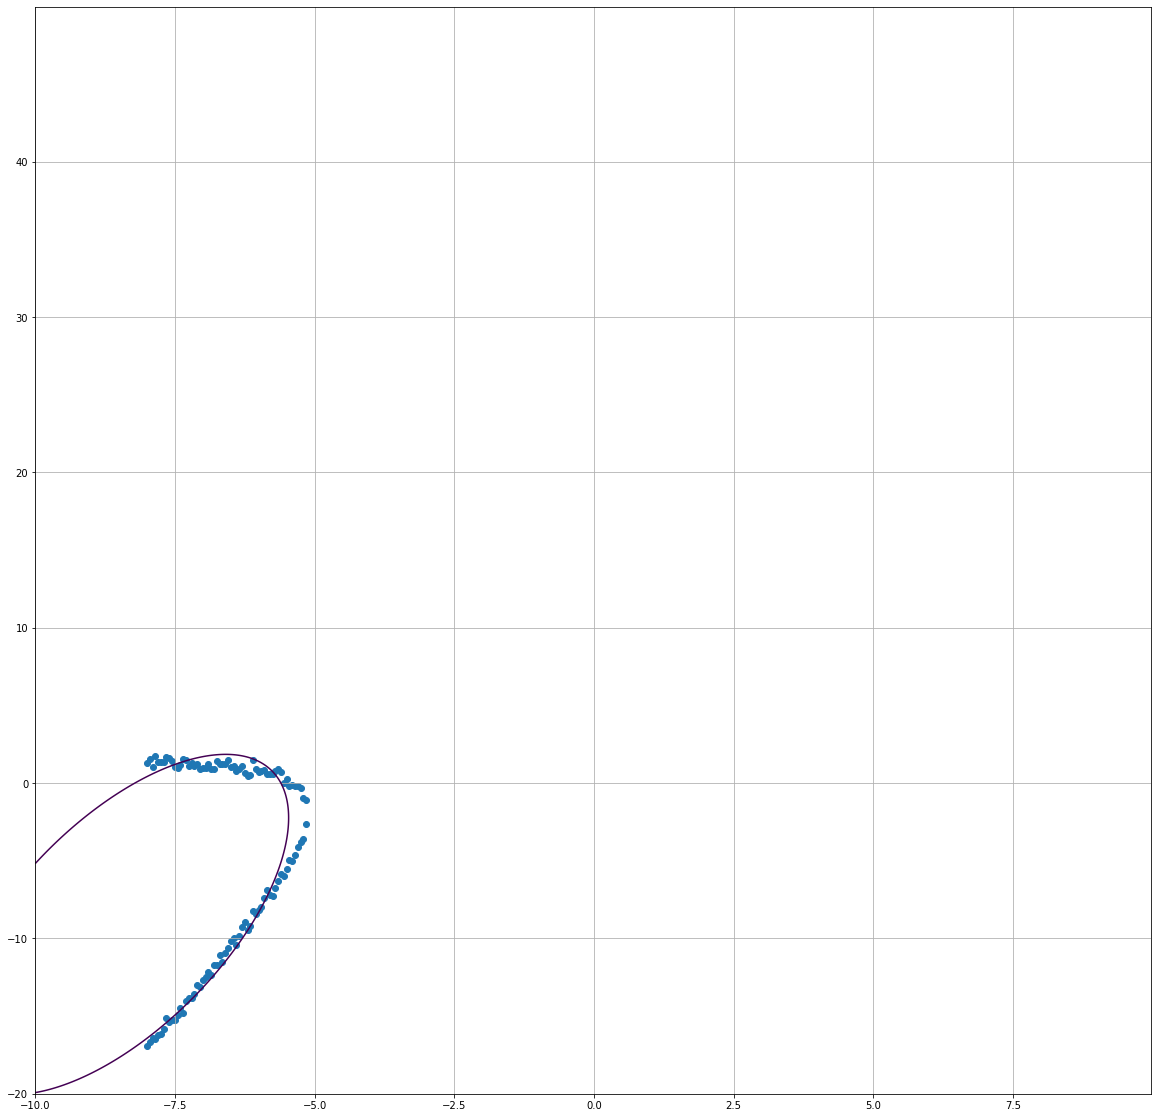

In [11]:
# гипербола

matrix_monomials = np.array([
        [x*x, x*y, y*y, x, y, 1]
        for (x,y) in hyperbola_positive])
M = np.matmul(matrix_monomials.T, matrix_monomials)
for vector in svd(M)[2]:
    sum = 0
    for elem in vector:
        sum += elem*elem
    vector/= np.sqrt(sum)
    print_conic(vector, hyperbola_positive,-10, 10, -20, 50)

#alg_lin_result = alg_lin_method(hyperbola_negative)


matrix_monomials = np.array([
        [x*x, x*y, y*y, x, y, 1]
        for (x,y) in hyperbola_negative])
M = np.matmul(matrix_monomials.T, matrix_monomials)
for vector in svd(M)[2]:
    sum = 0
    for elem in vector:
        sum += elem*elem
    vector/= np.sqrt(sum)
    print_conic(vector, hyperbola_negative,-10, 10, -20, 50)

/var/folders/64/8wd7l9zd709fzvrfc3z9pzdr0000gn/T/ipykernel_18475/2184950280.py:15: UserWarning: No contour levels were found within the data range.
  plt.contour(X, Y, F - G, [0])


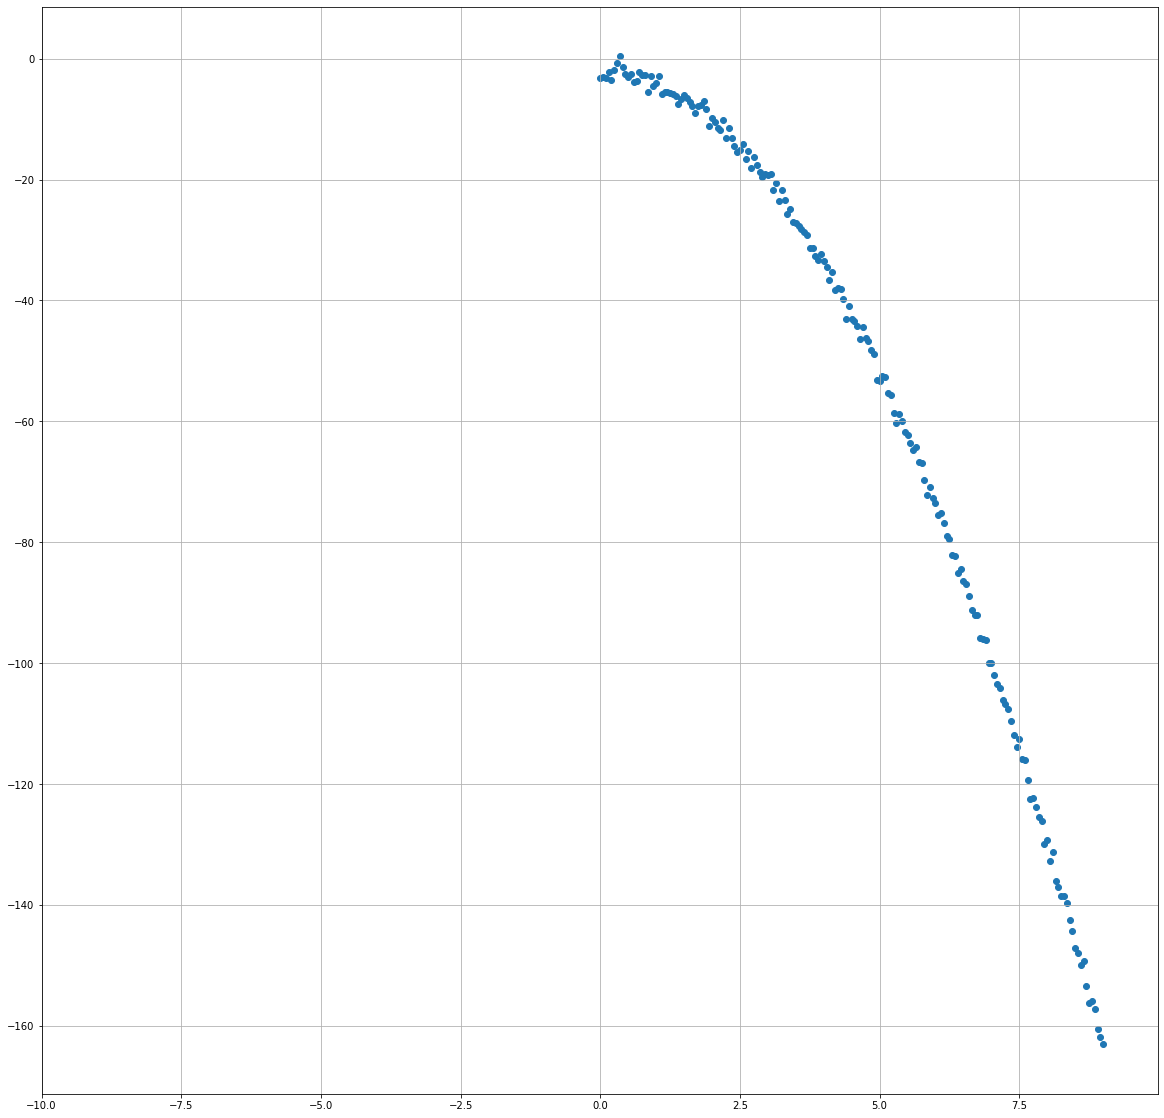

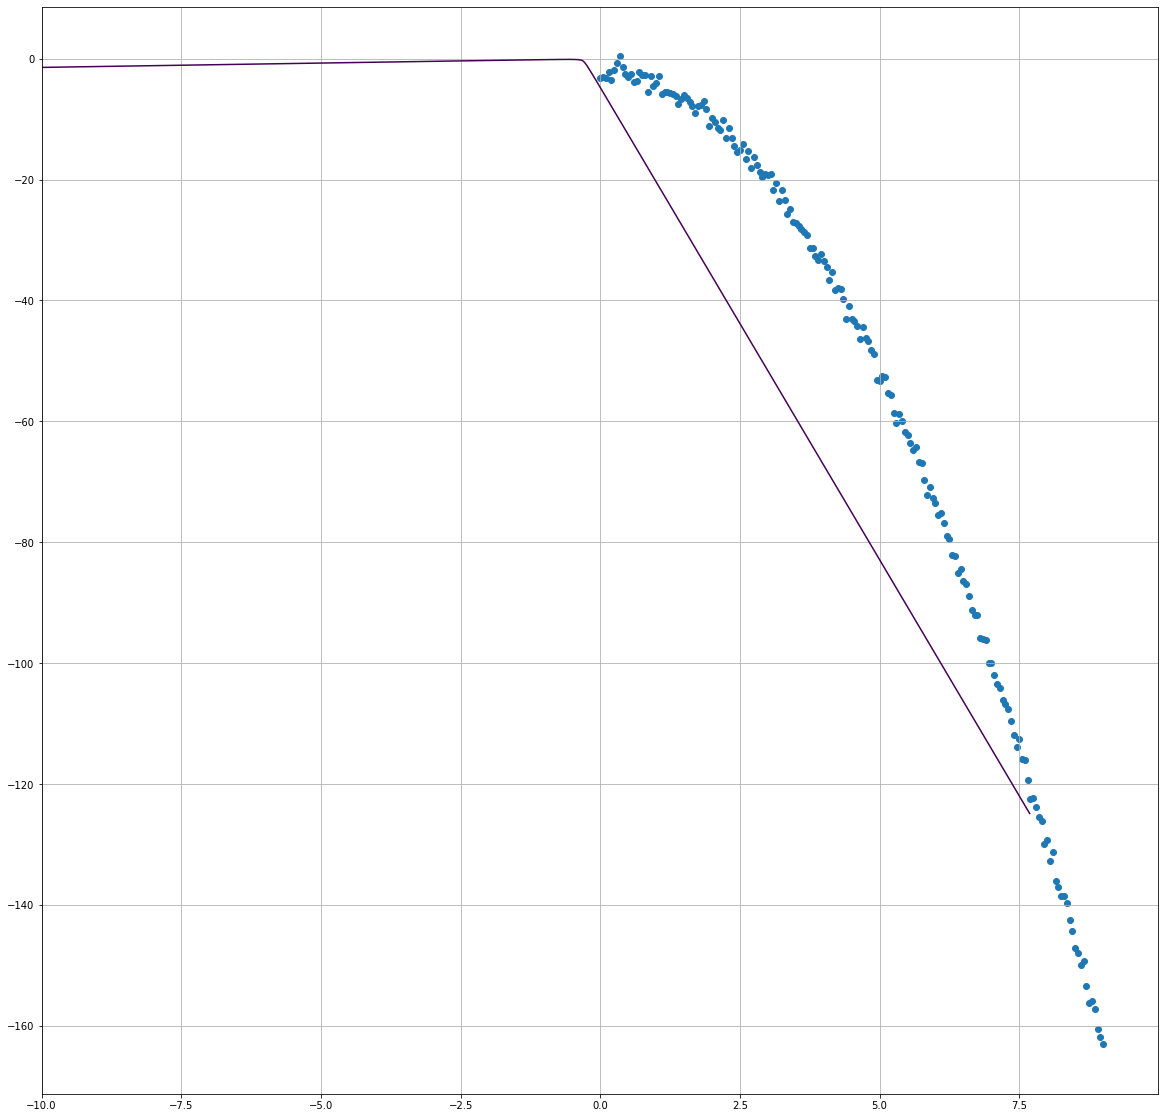

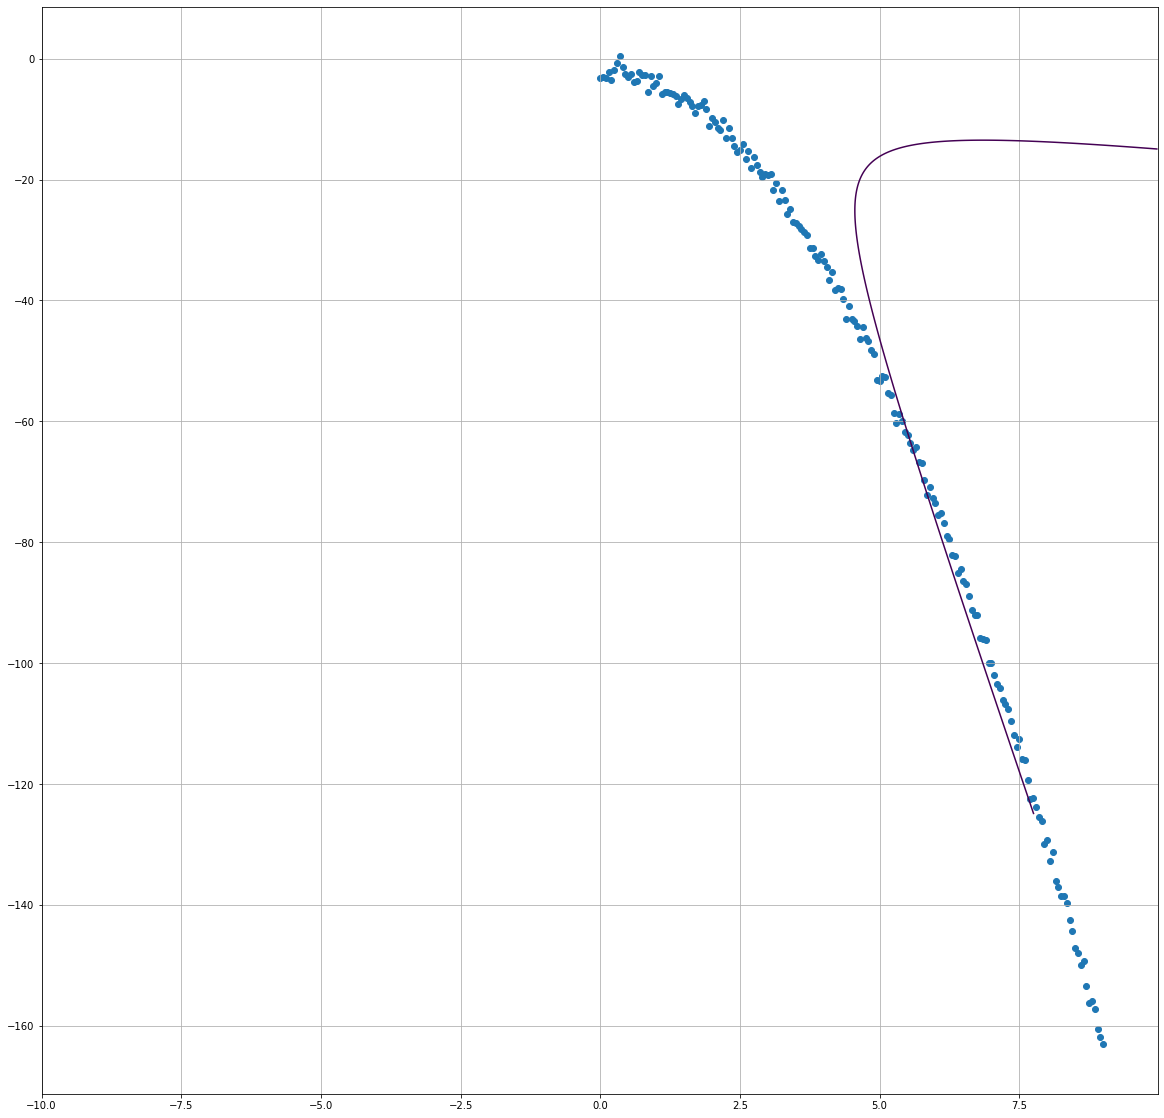

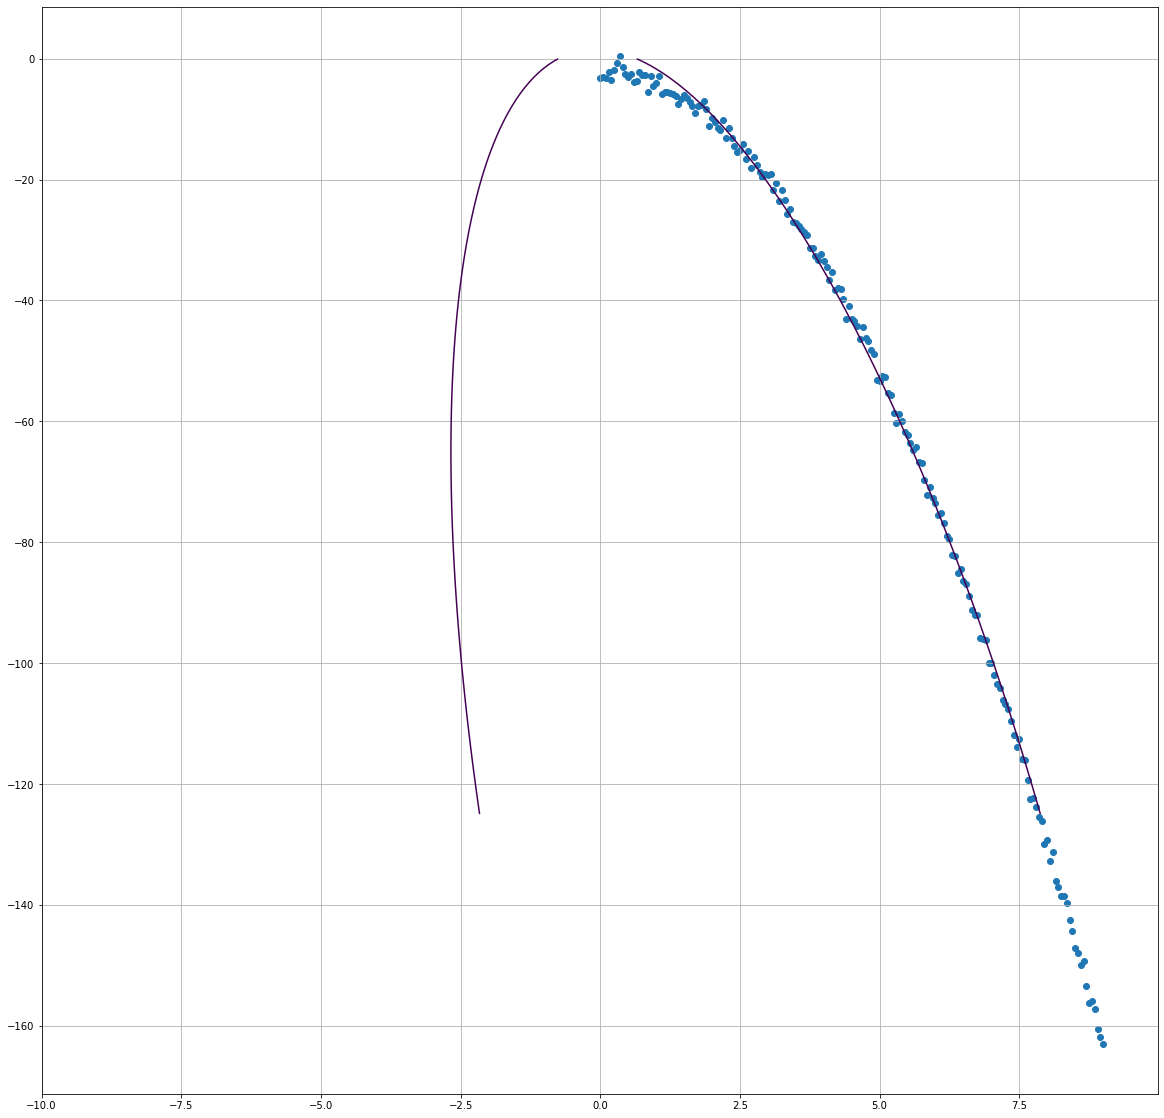

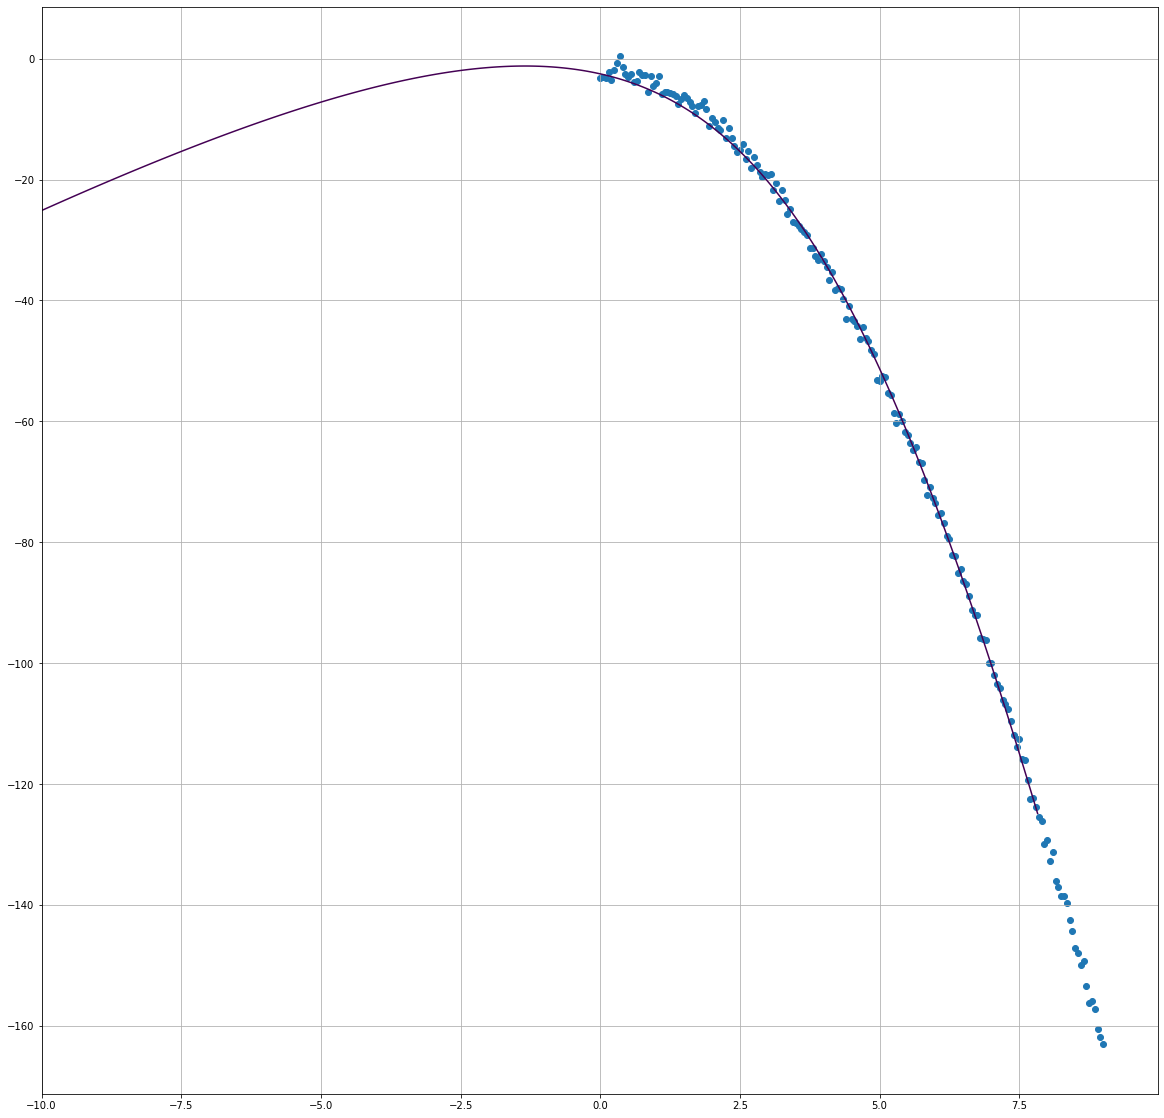

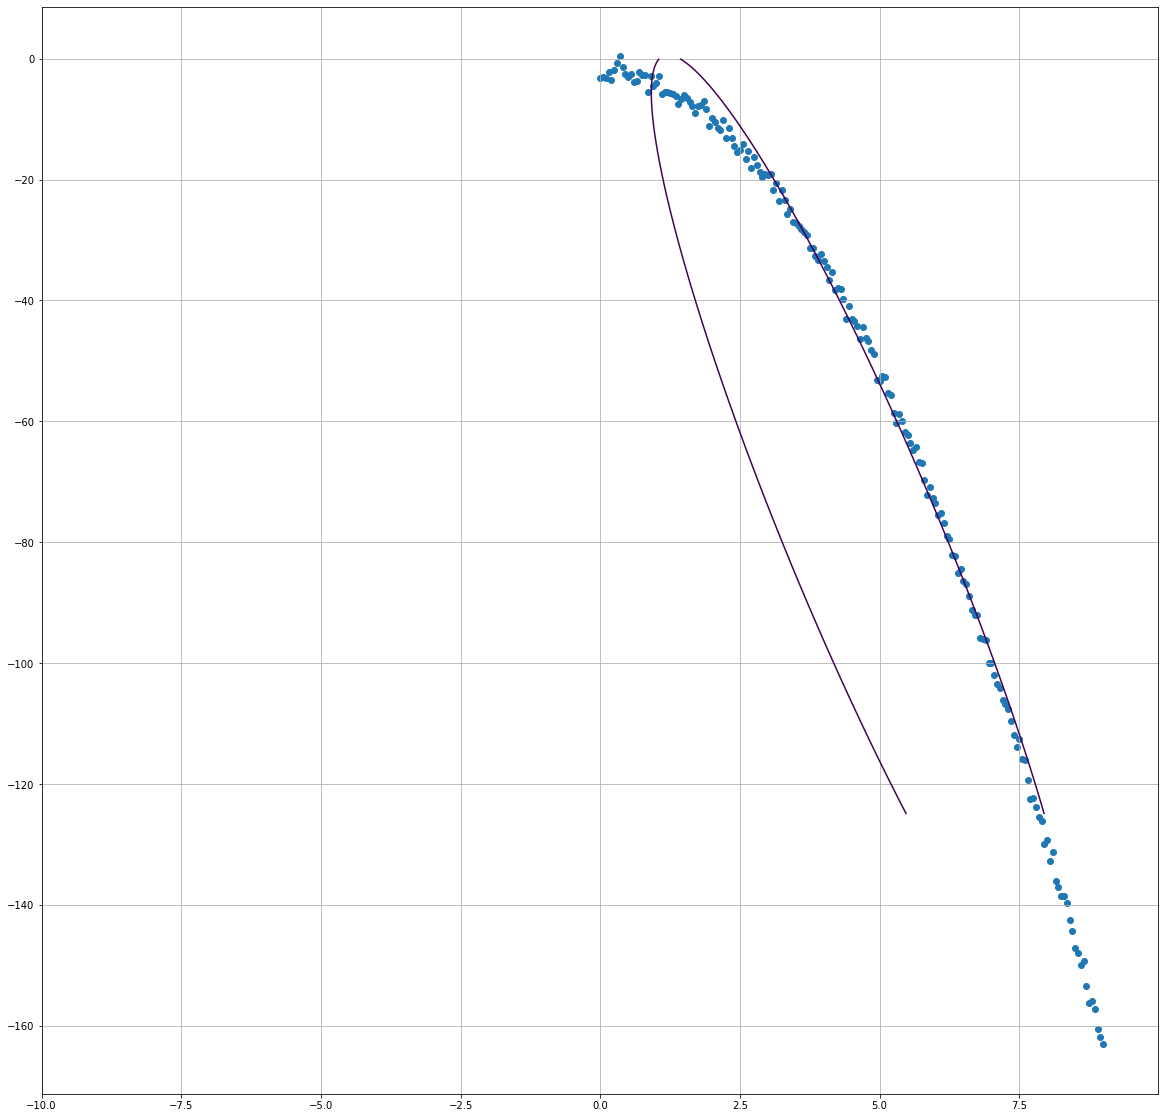

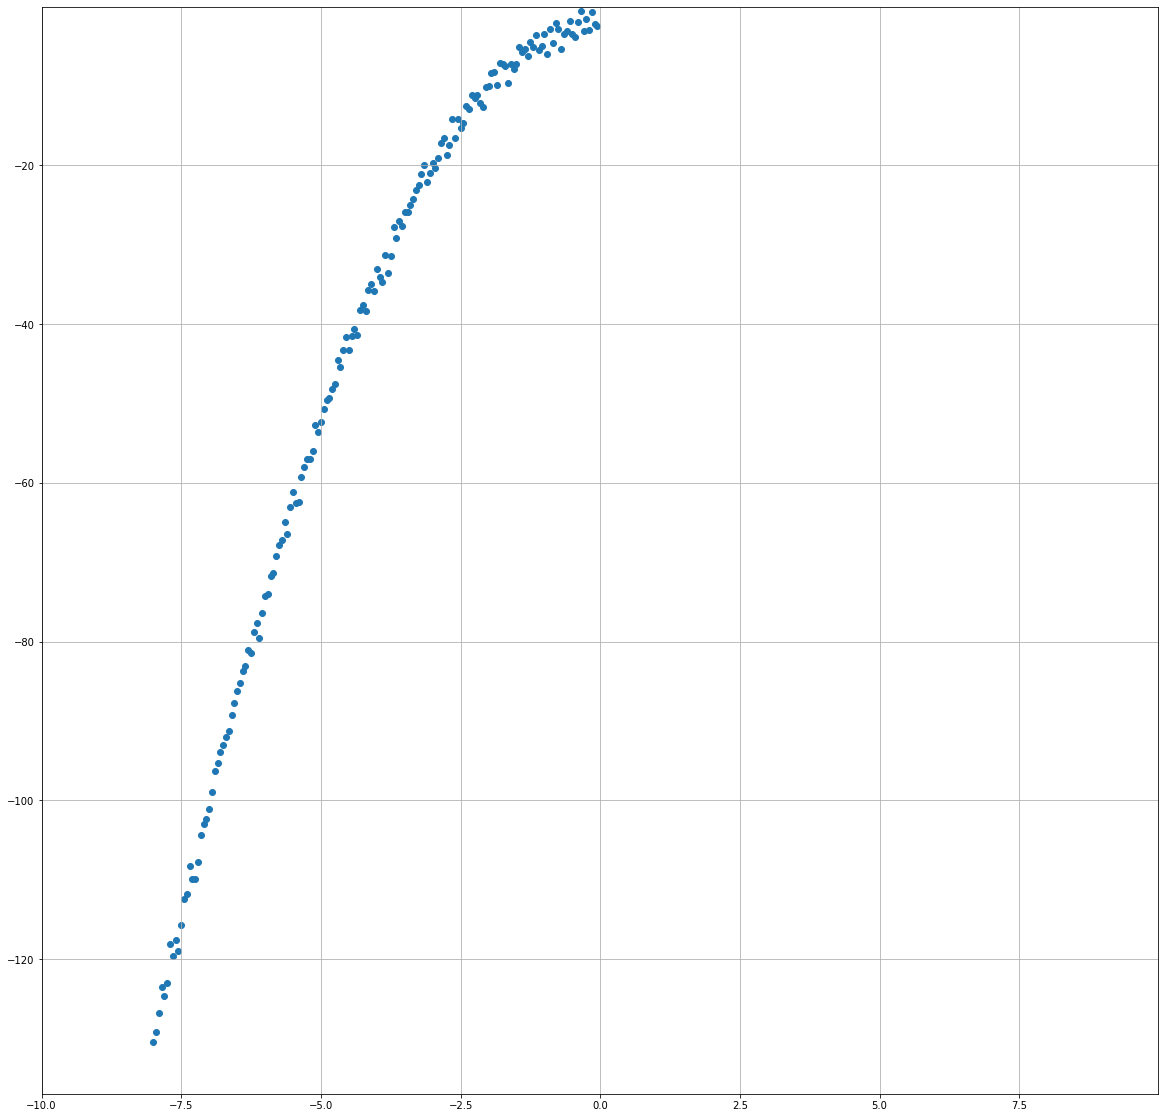

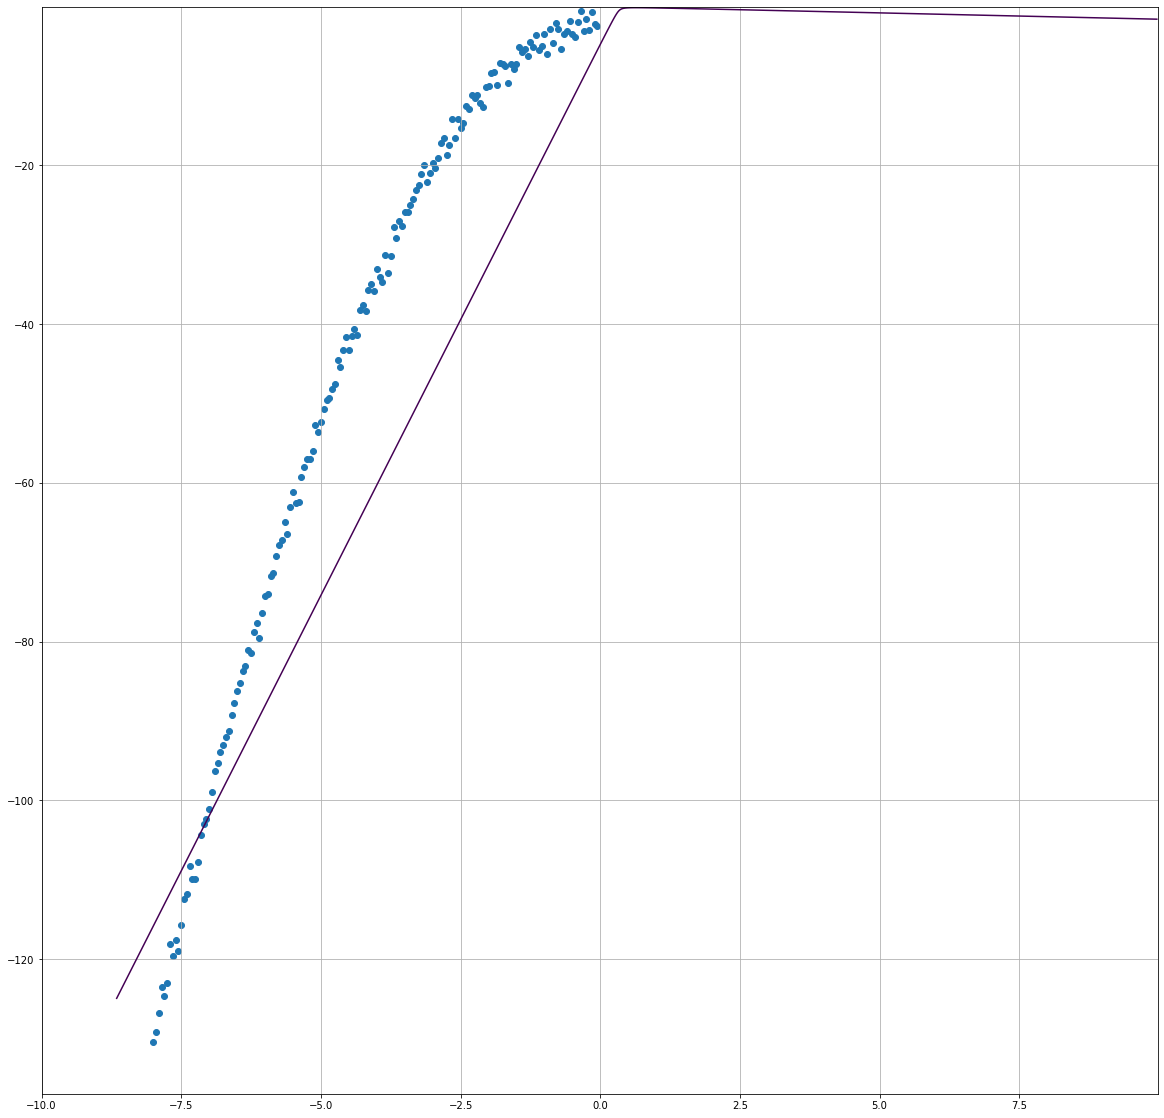

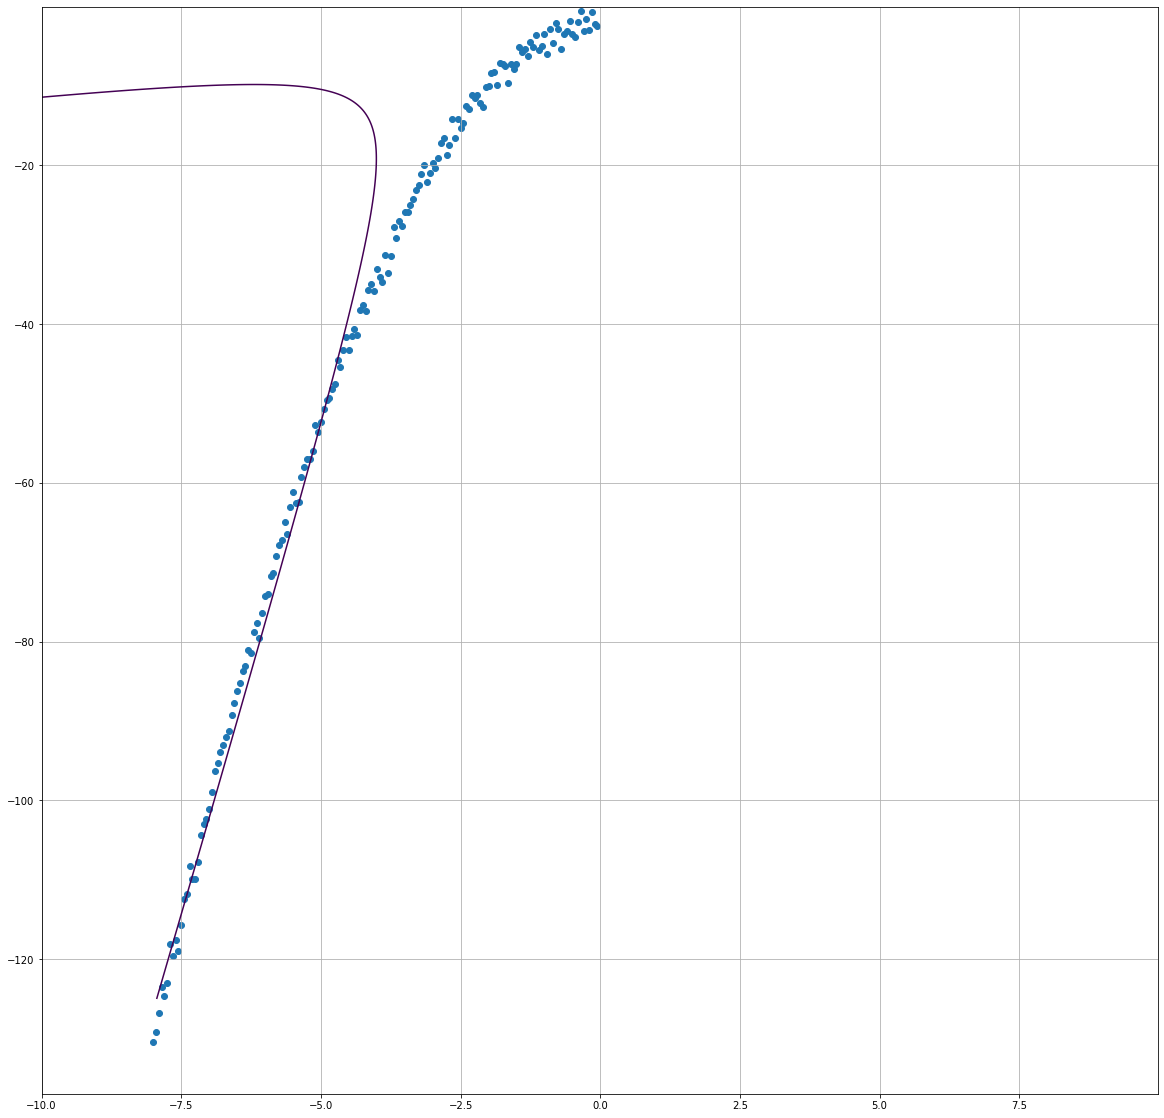

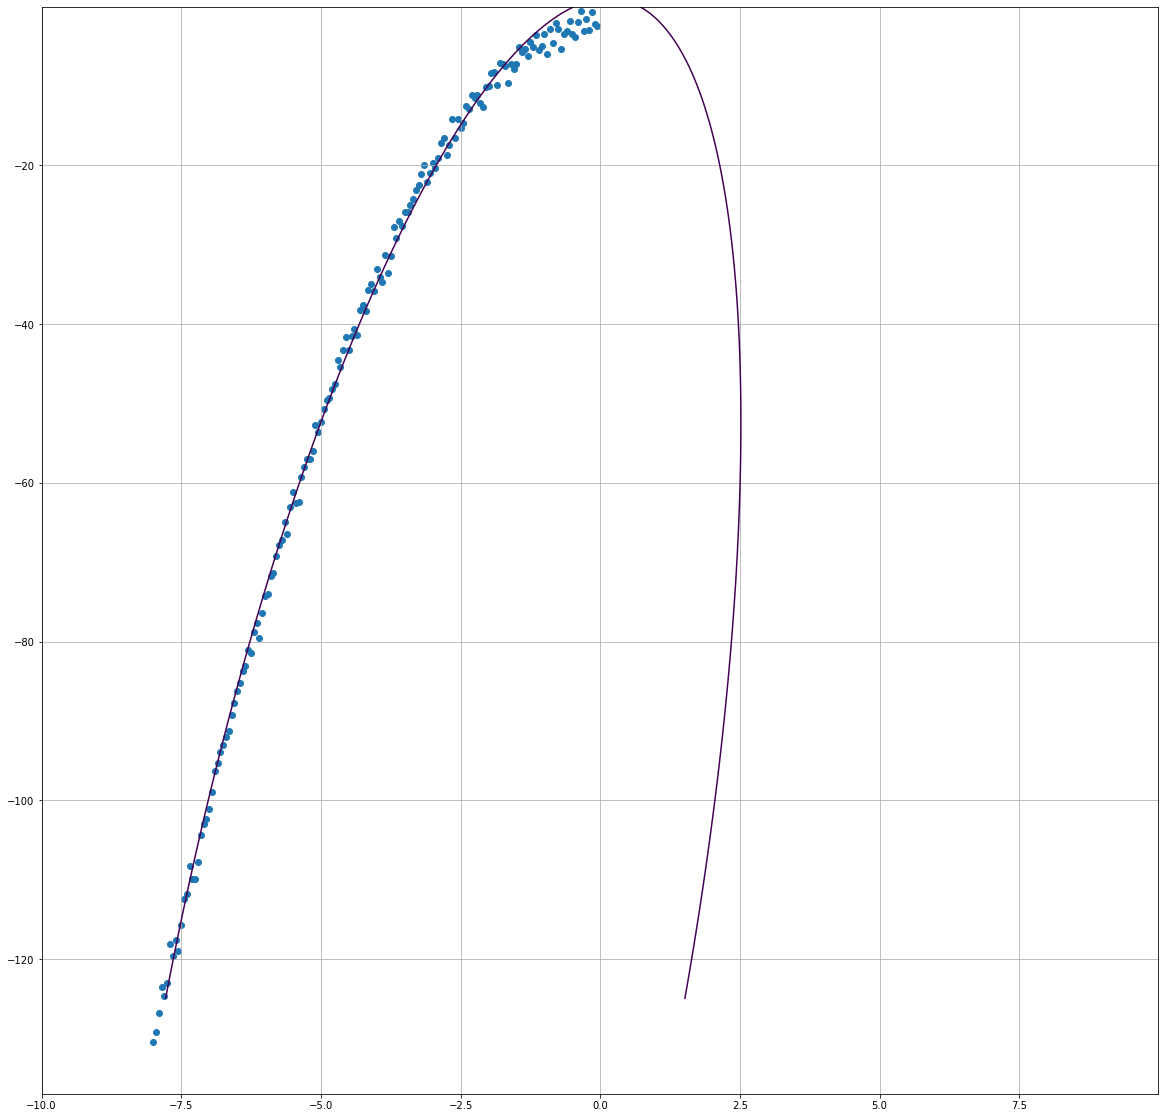

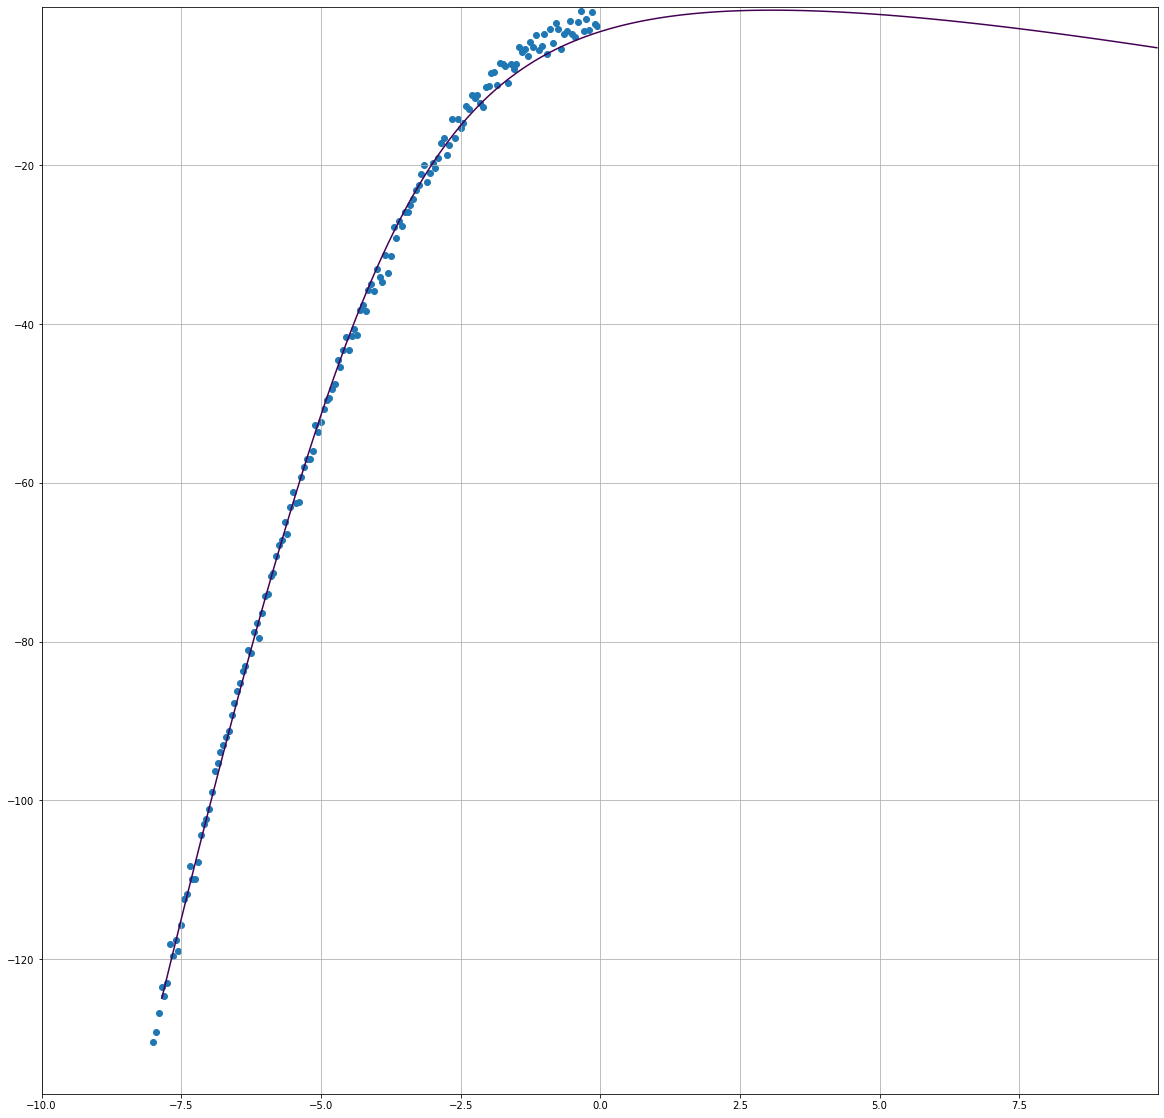

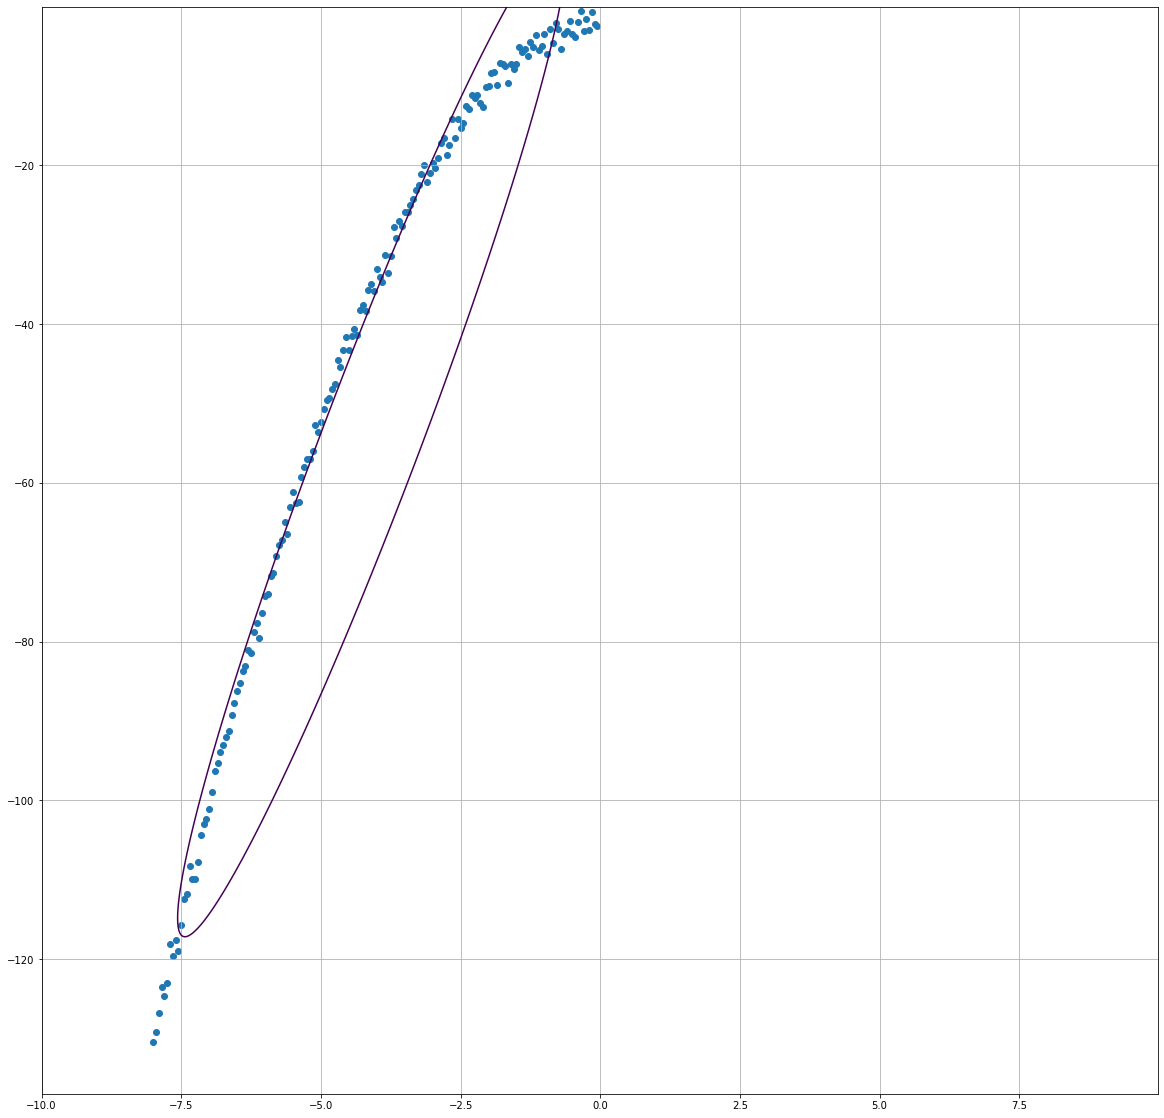

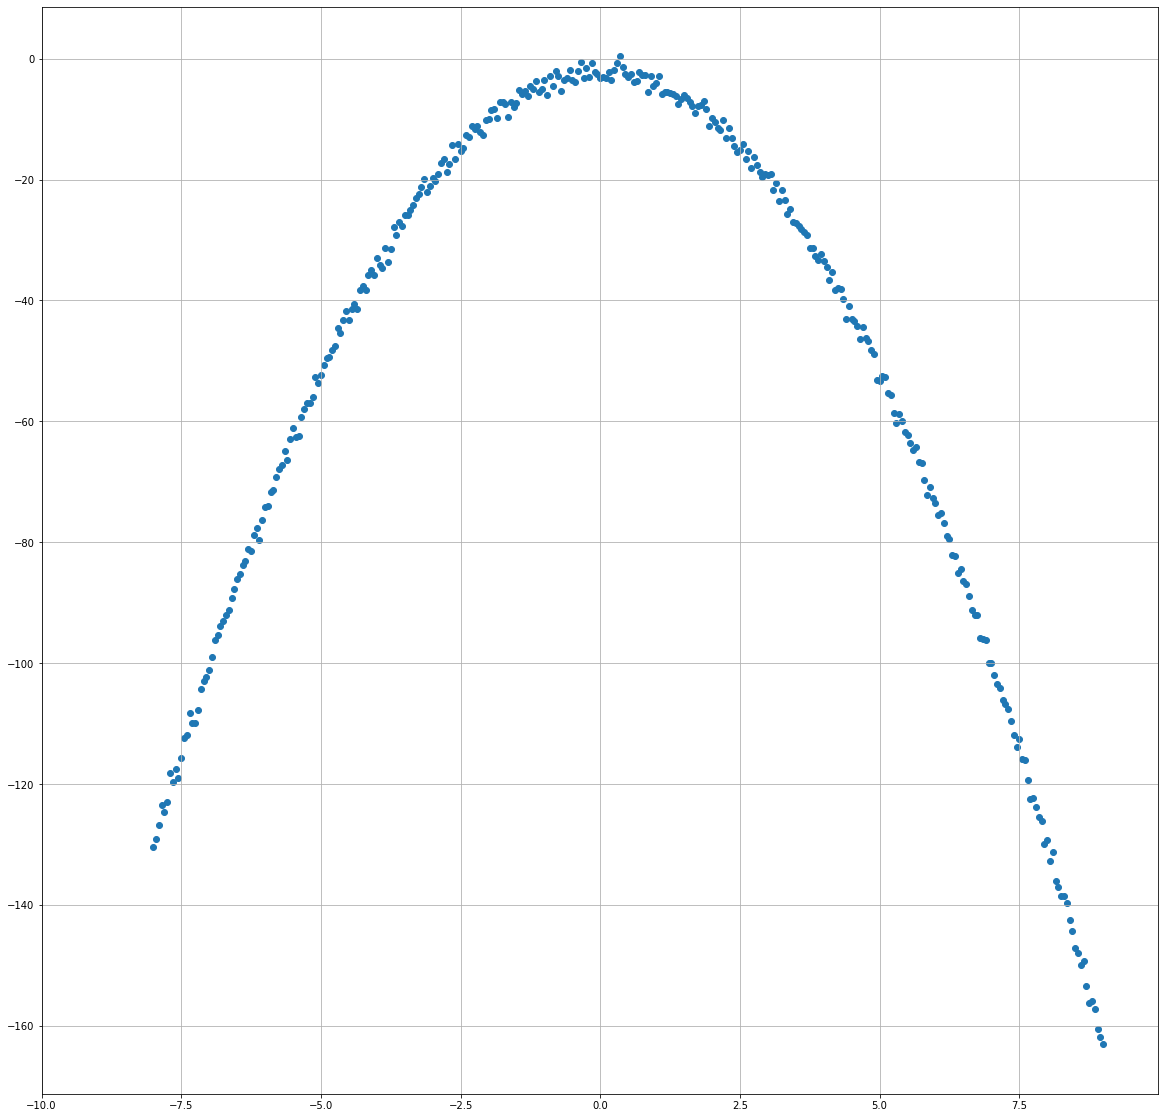

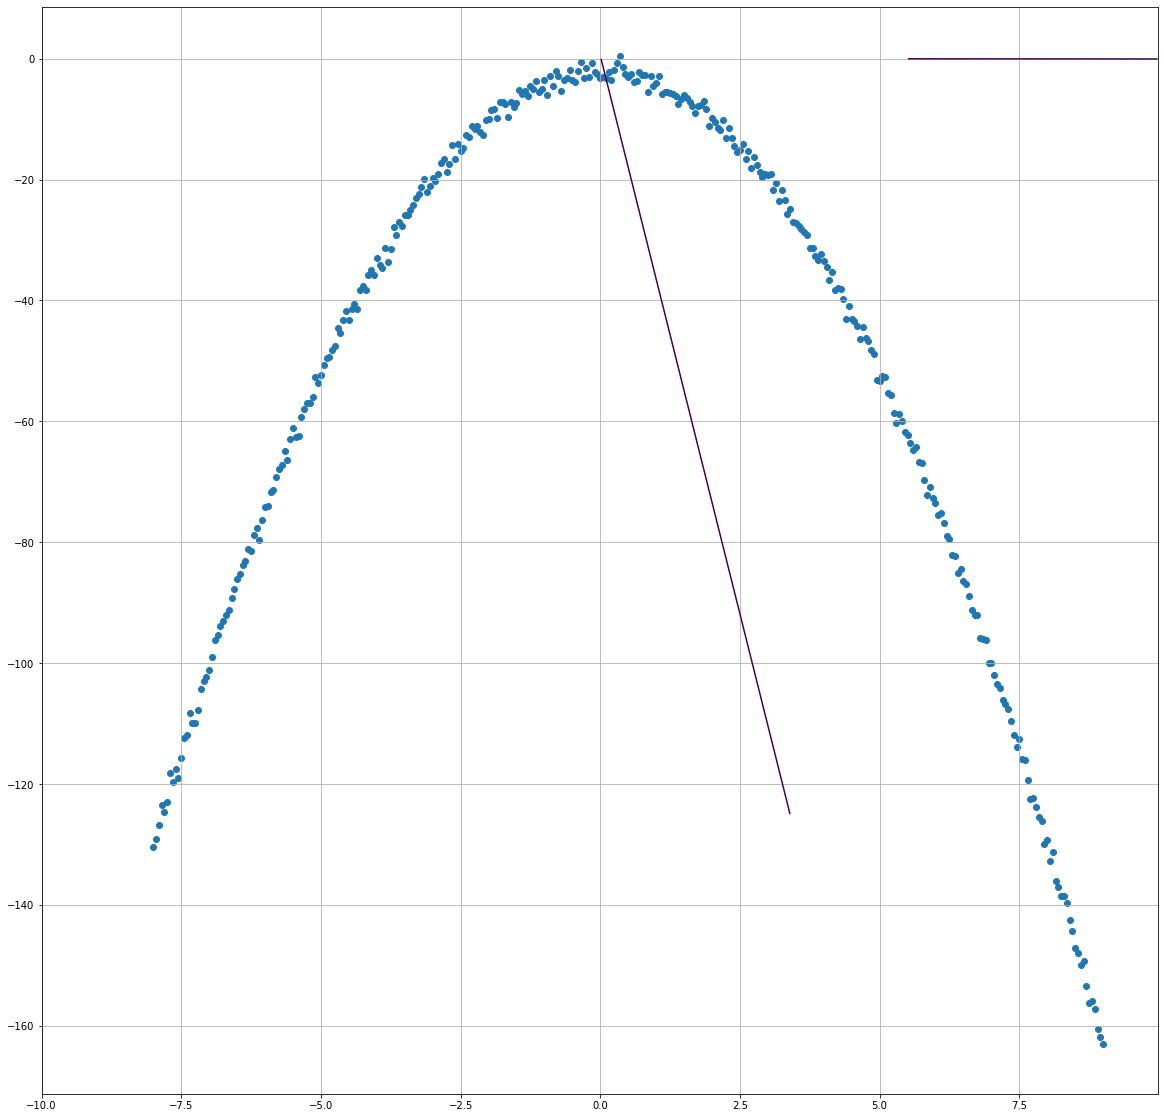

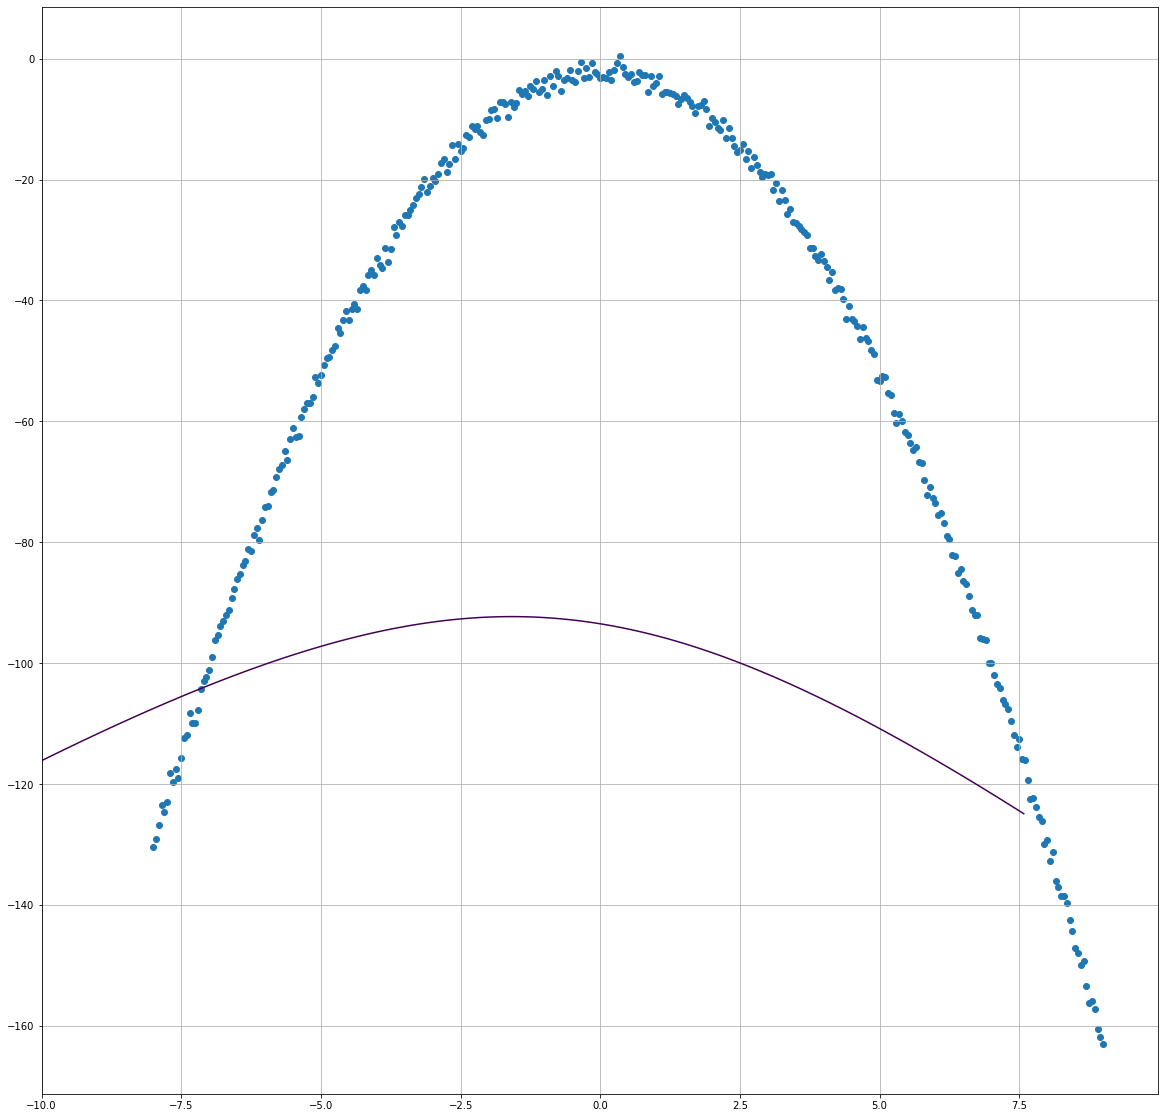

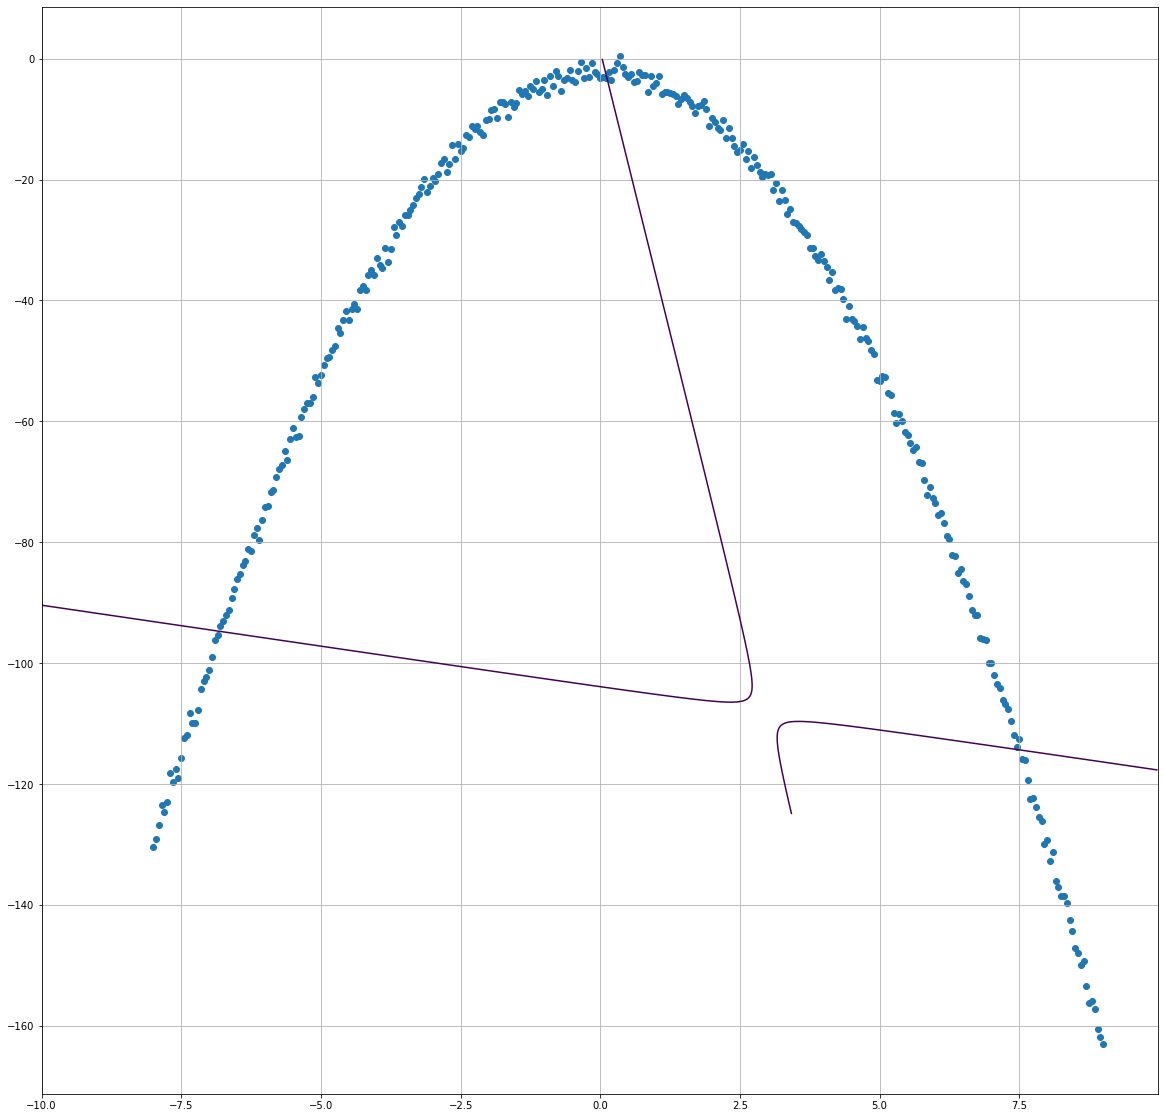

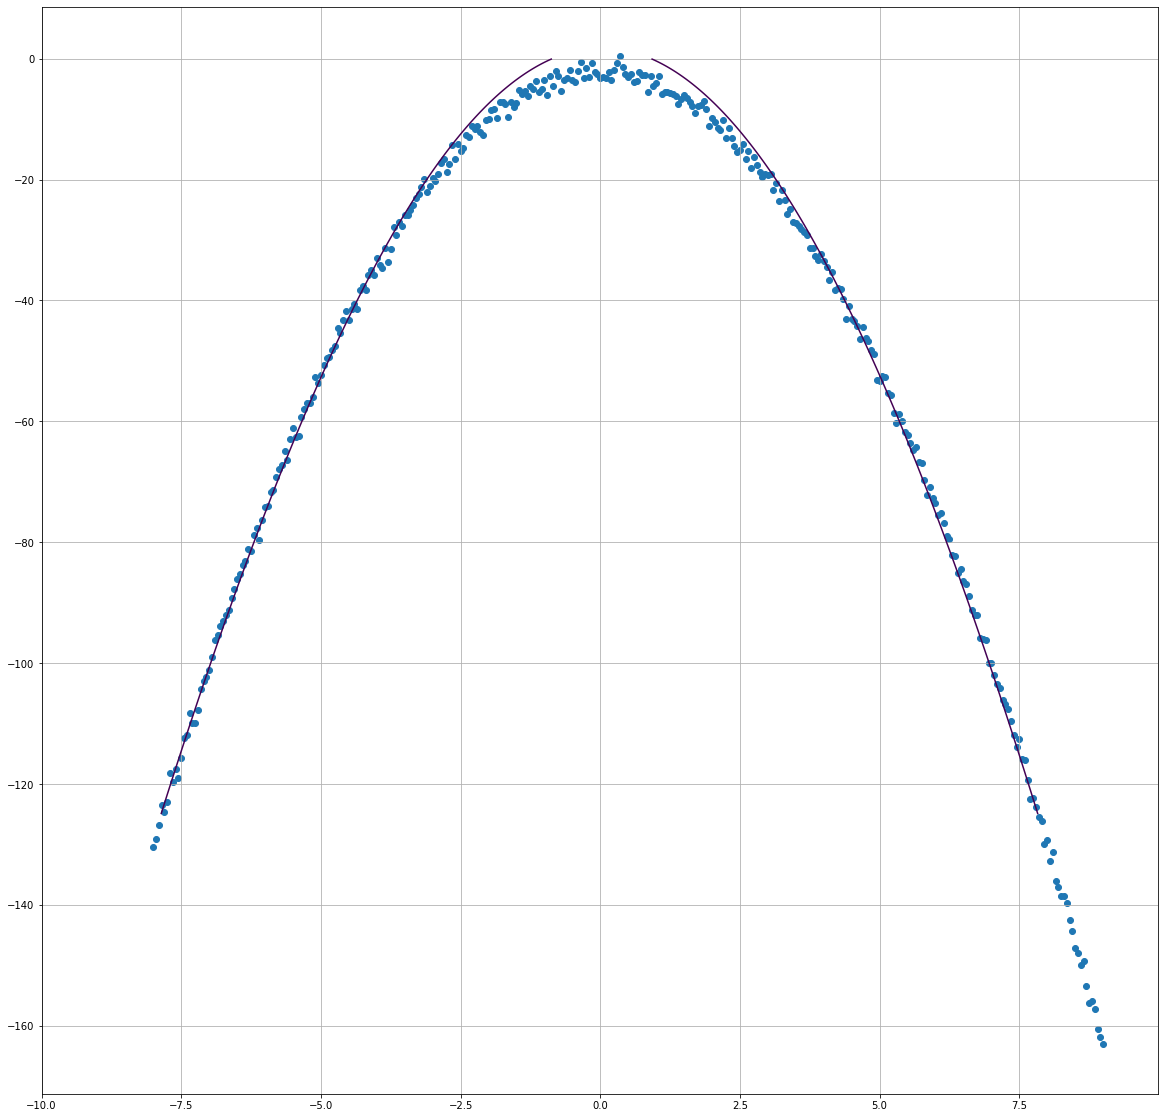

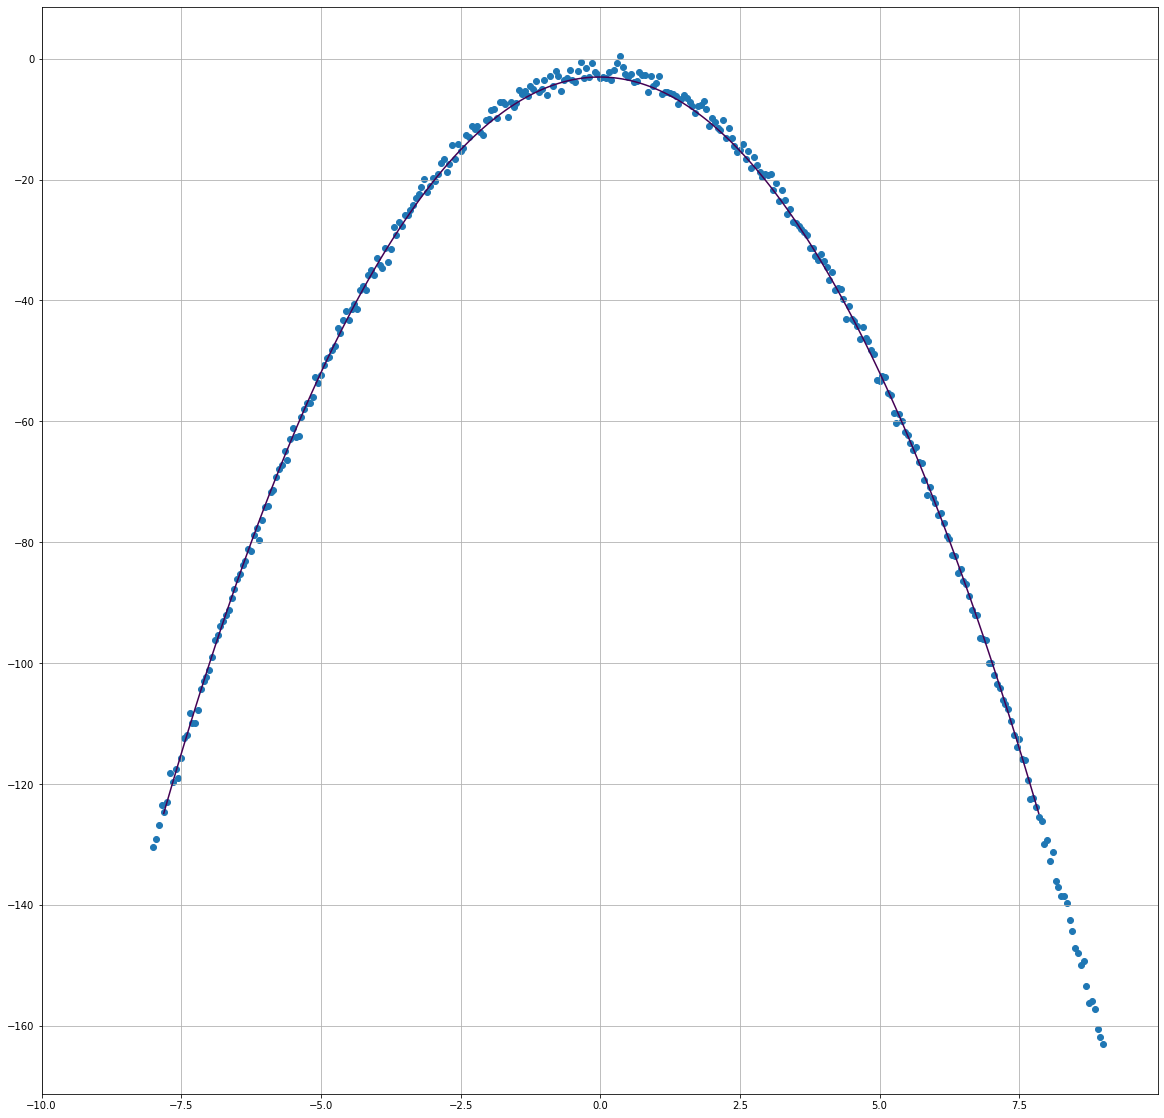

In [12]:
# parabola

matrix_monomials = np.array([
        [x*x, x*y, y*y, x, y, 1]
        for (x,y) in parabola_positive])
M = np.matmul(matrix_monomials.T, matrix_monomials)
for vector in svd(M)[2]:
    sum = 0
    for elem in vector:
        sum += elem*elem
    vector/= np.sqrt(sum)
    print_conic(vector, parabola_positive,-10, 10, -125, 0)

#alg_lin_result = alg_lin_method(hyperbola_negative)


matrix_monomials = np.array([
        [x*x, x*y, y*y, x, y, 1]
        for (x,y) in parabola_negative])
M = np.matmul(matrix_monomials.T, matrix_monomials)
for vector in svd(M)[2]:
    sum = 0
    for elem in vector:
        sum += elem*elem
    vector/= np.sqrt(sum)
    print_conic(vector, parabola_negative,-10, 10, -125, 0)
    
matrix_monomials = np.array([
        [x*x, x*y, y*y, x, y, 1]
        for (x,y) in parabola])
M = np.matmul(matrix_monomials.T, matrix_monomials)
for vector in svd(M)[2]:
    sum = 0
    for elem in vector:
        sum += elem*elem
    vector/= np.sqrt(sum)
    print_conic(vector, parabola, -10, 10, -125, 0)

2. Простейший алгебраический метод с изменением весов

In [5]:
eps = 0.00000000001

    
def weighted_alg_lin_method(data, weights):
    x = np.array([[
            data[0][0]**2,
            data[0][0]*data[0][1],
            data[0][1]**2,
            data[0][0],
            data[0][1],
            1
            ]])
    matrix = weights[0]*np.matmul(x.T, x)
    
    for i in range(1,len(data)):
        row = np.array([[
            data[i][0]**2,
            data[i][0]*data[i][1],
            data[i][1]**2,
            data[i][0],
            data[i][1],
            1
        ]])
        matrix += weights[i]*np.matmul(row.T, row)
        
    min = np.inf
    min_k = 0
    k = 0
    for vector in svd(matrix)[2]:
        sum = 0
        for elem in vector:
            sum += elem*elem
        vector /= np.sqrt(sum)
        if sampson_dist(vector, data) < min:
            min = sampson_dist(vector, data)
            min_k = k
        k += 1
    vector = svd(matrix)[2][min_k]
    sum = 0
    for elem in vector:
        sum += elem*elem
    vector /= np.sqrt(sum)
    return vector
    
def reweighted_alg_lin_method(data):
    weights = np.ones(len(data))
    params = weighted_alg_lin_method(data, weights)
    result_params = params
    print("Initial functional value =", sampson_dist(result_params, data))
    j = 0
    while True:
        
        print("itteration", j)
        params = result_params
        weights = np.array([])
        for i in range(len(data)):
            grad = grad_conic(params, data[i])
            weights = np.append(weights, 1/(grad[0]**2 + grad[1]**2))
            #print(weights)
        result_params = weighted_alg_lin_method(data, weights)
        print("New functional value =", sampson_dist(result_params, data))
        j += 1
        if sampson_dist(result_params, data) >=  sampson_dist(params, data):
            break
#         if j == 20:
#             break
    if sampson_dist(result_params, data) < (1 - eps) * sampson_dist(params, data):
        return result_params
    else:
        return params

Initial functional value = [2.08891062]
itteration 0
New functional value = [2.17731417]


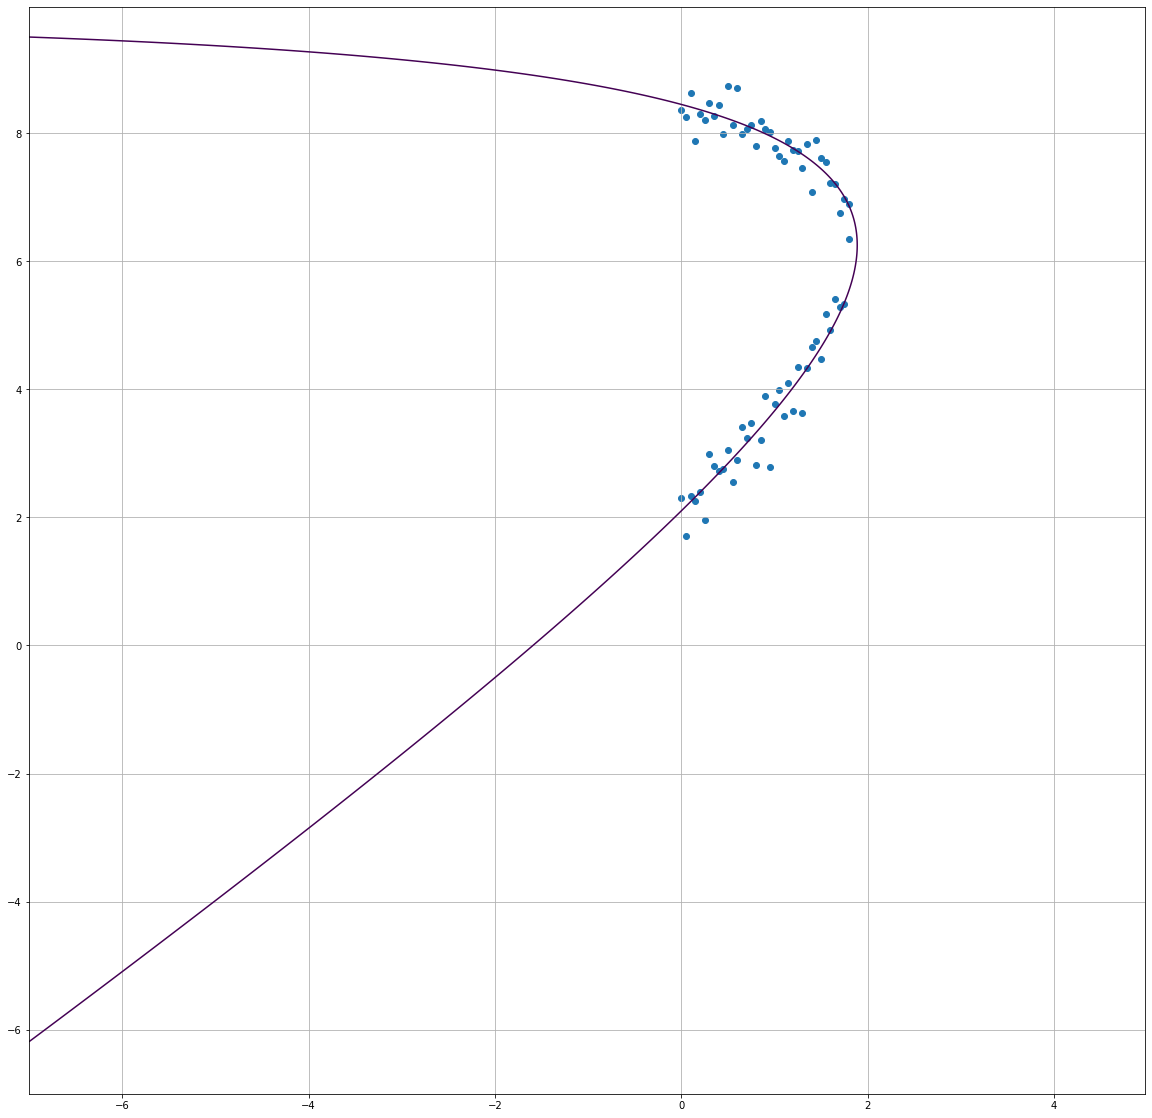

Initial functional value = [5.70715473]
itteration 0
New functional value = [6.10115317]


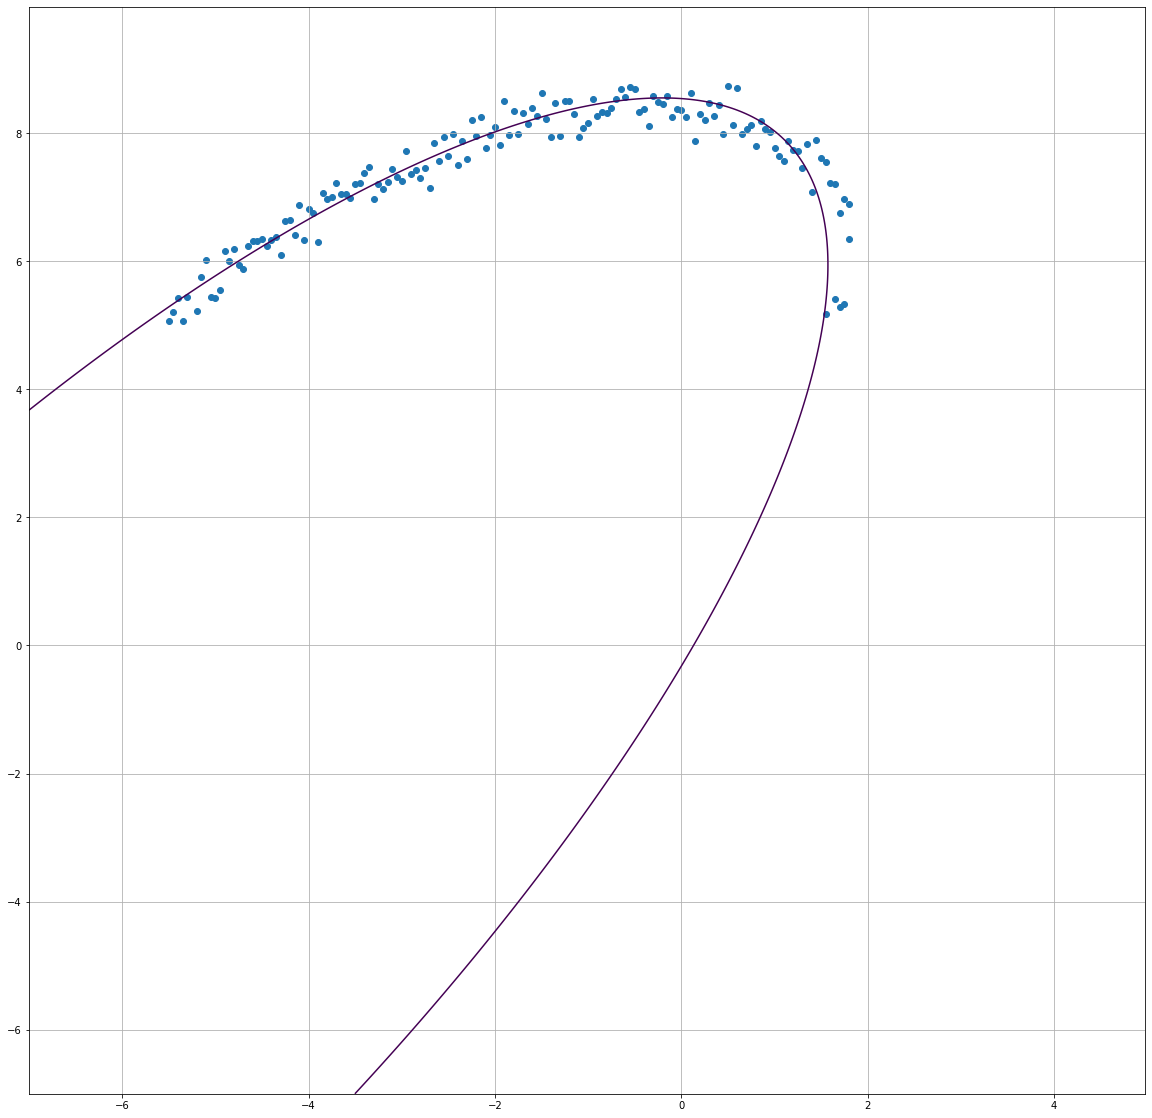

In [6]:
# ellipse

result_reweighted_alg_lin_method = reweighted_alg_lin_method(ellipse_positive)
print_conic(result_reweighted_alg_lin_method, ellipse_positive,-7., 5., -7., 10. )

result_reweighted_alg_lin_method = reweighted_alg_lin_method(ellipse_upper)
print_conic(result_reweighted_alg_lin_method, ellipse_upper,-7., 5., -7., 10. )

Initial functional value = [0.14247248]
itteration 0
New functional value = [0.14376955]


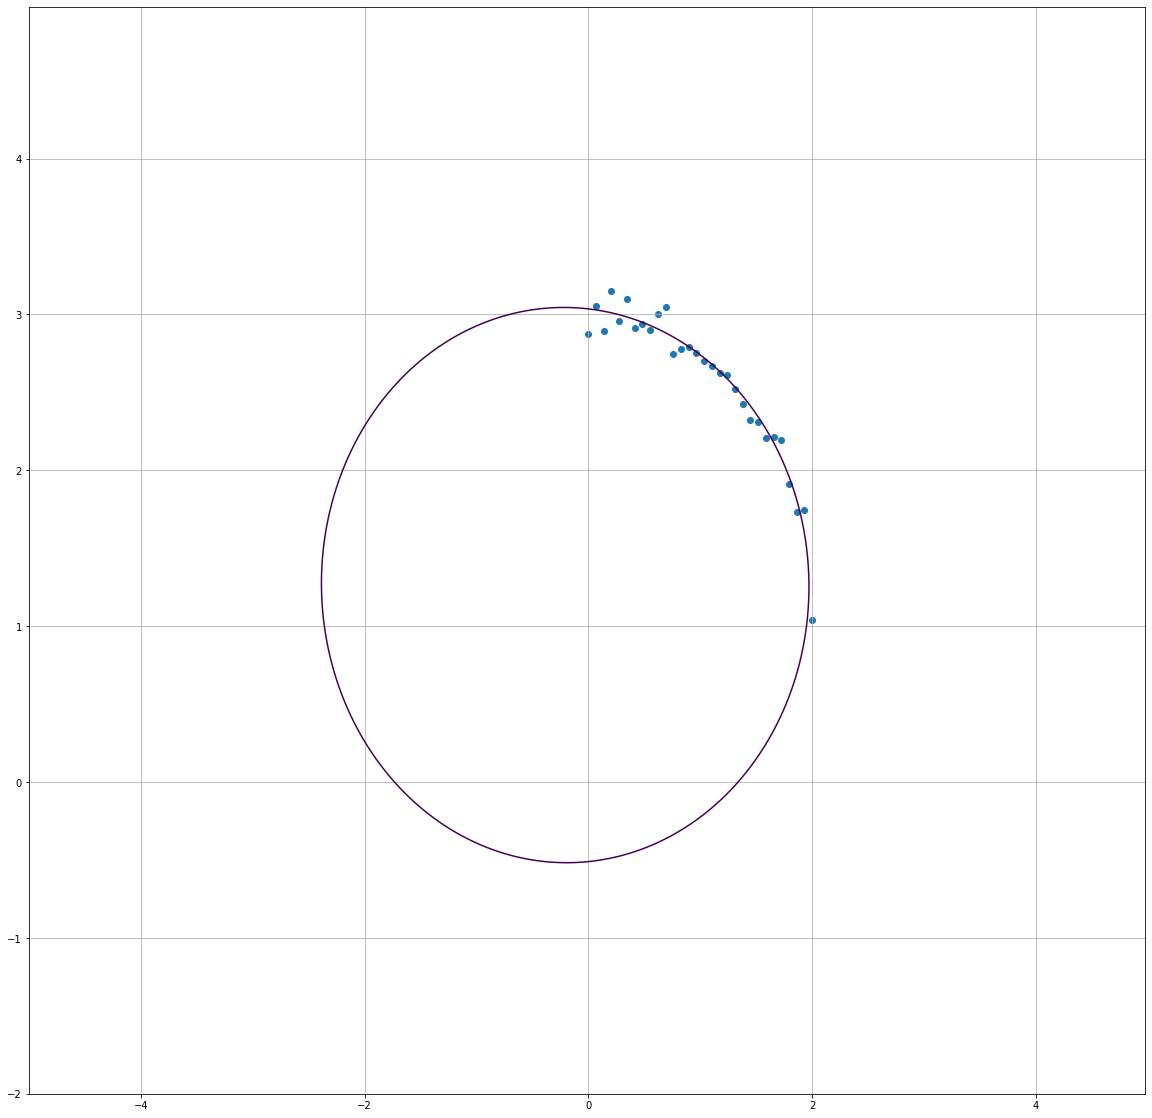

In [30]:
# circle

result_reweighted_alg_lin_method = reweighted_alg_lin_method(circle)
print_conic(result_reweighted_alg_lin_method, circle,-5, 5, -2, 5 )

Initial functional value = [0.8307527]
itteration 0
New functional value = [0.77685409]
itteration 1
New functional value = [0.77661752]
itteration 2
New functional value = [0.77661766]


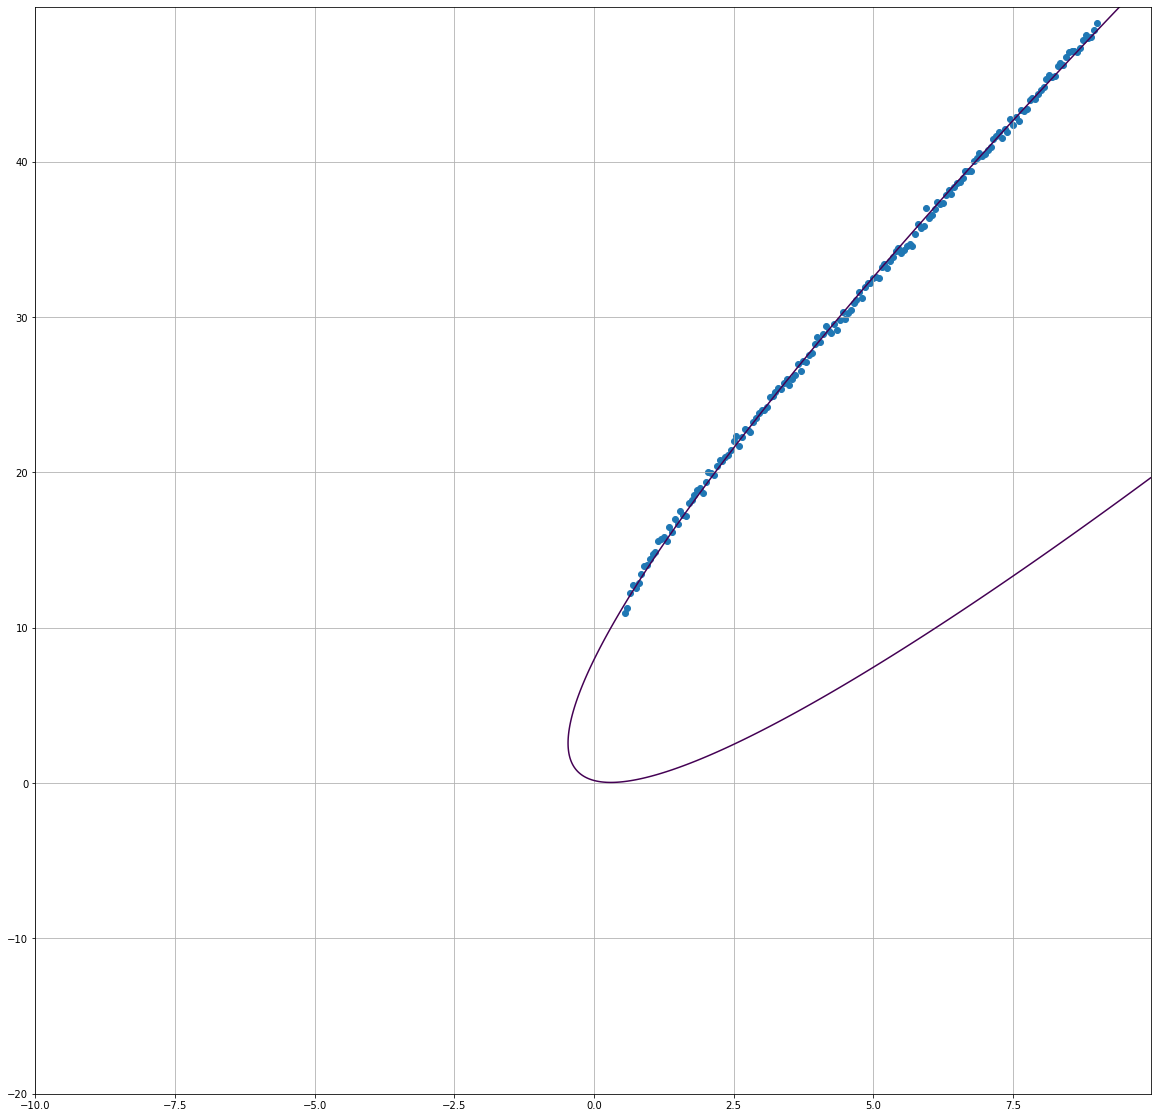

Initial functional value = [3.15521809]
itteration 0
New functional value = [3.38214038]


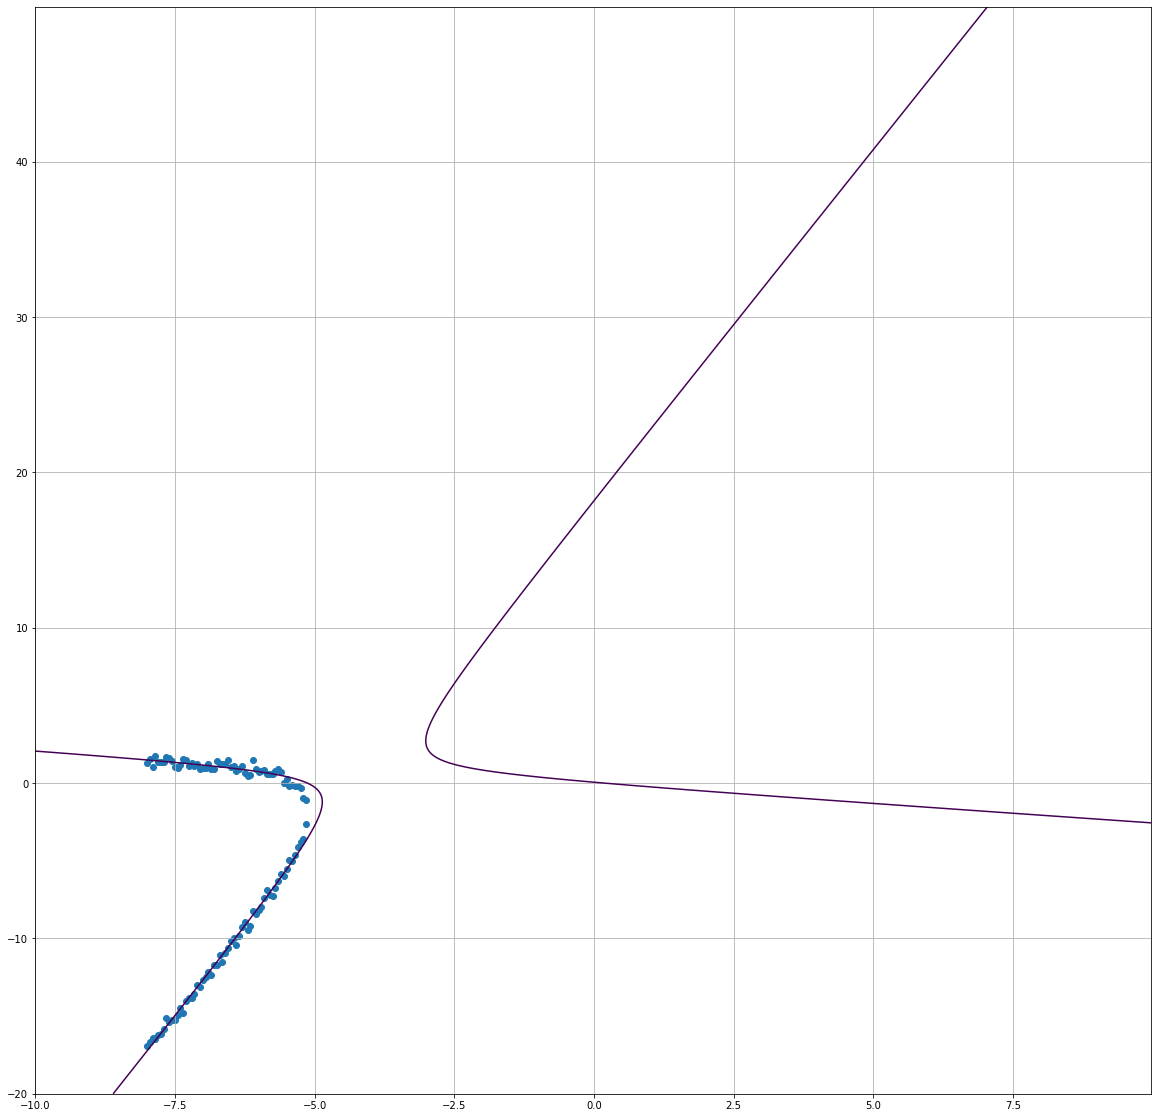

In [8]:
# hyperbola

result_reweighted_alg_lin_method = reweighted_alg_lin_method(hyperbola_upper)
print_conic(result_reweighted_alg_lin_method, hyperbola_upper,-10, 10, -20, 50 )

result_reweighted_alg_lin_method = reweighted_alg_lin_method(hyperbola_negative)
print_conic(result_reweighted_alg_lin_method, hyperbola_negative,-10, 10, -20, 50 )

Initial functional value = [0.31127048]
itteration 0
New functional value = [0.31434112]


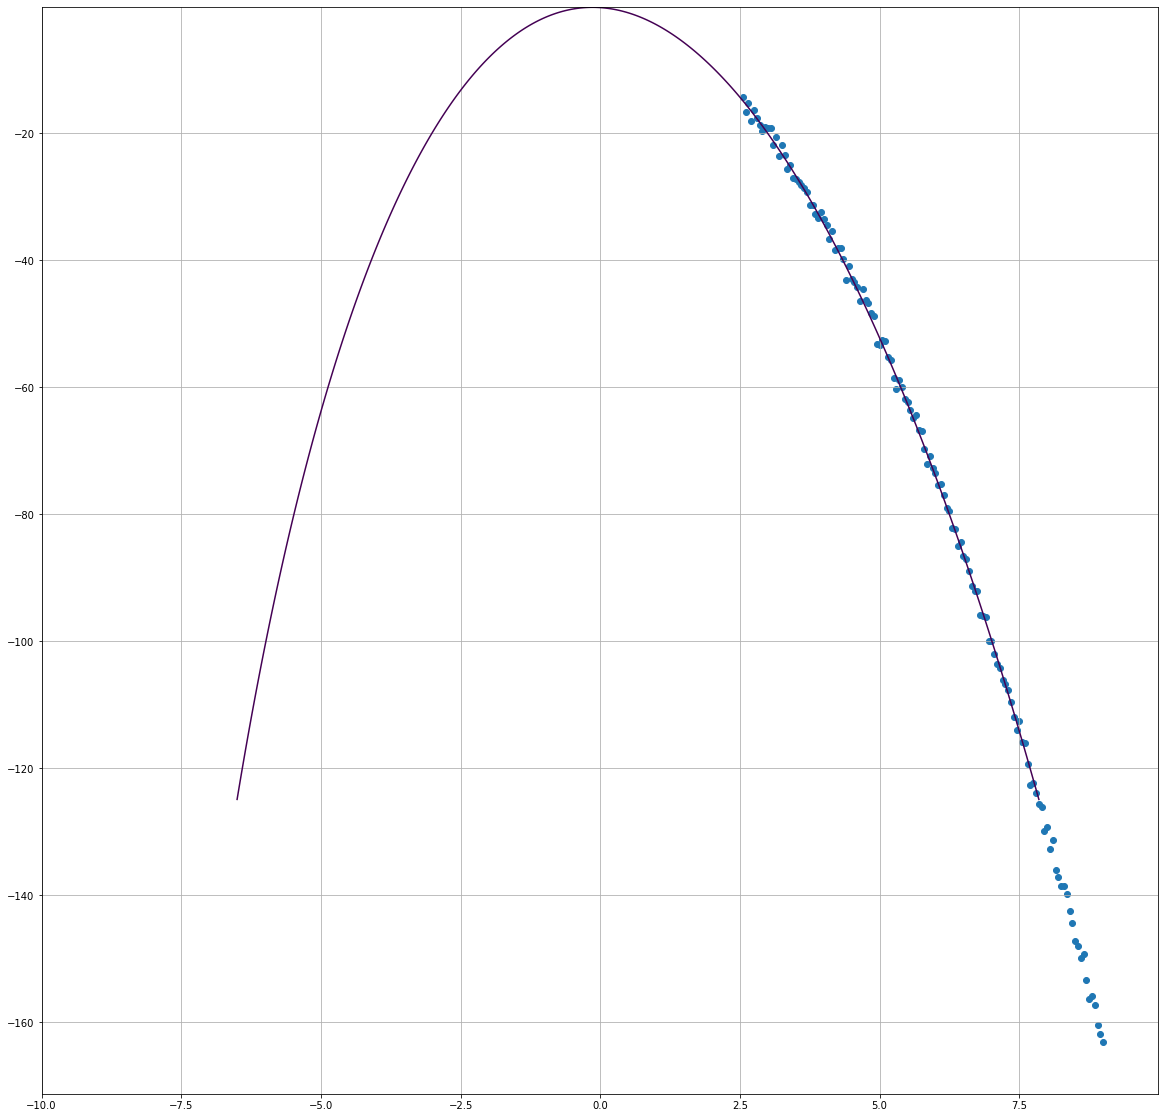

In [16]:
# parabola

result_reweighted_alg_lin_method = reweighted_alg_lin_method(parabola_upper)
print_conic(result_reweighted_alg_lin_method, parabola_upper,  -10, 10, -125, 0 )

Initial functional value = [1.54559796]
itteration 0
New functional value = [1.43754567]
itteration 1
New functional value = [1.43404622]
itteration 2
New functional value = [1.43475363]


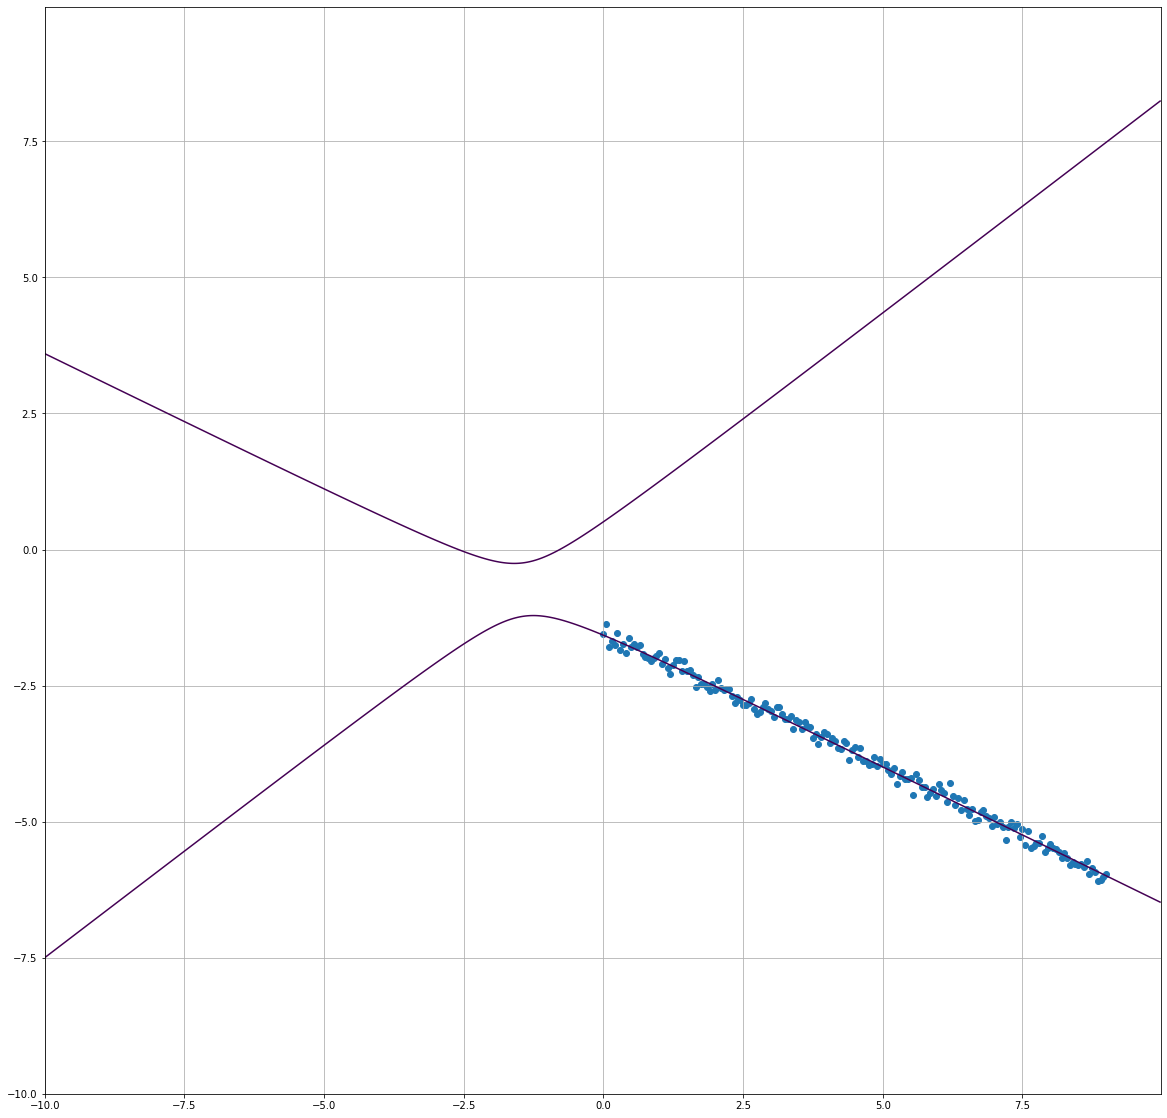

Initial functional value = [2.80071355]
itteration 0
New functional value = [2.55420381]
itteration 1
New functional value = [2.55246299]
itteration 2
New functional value = [2.55097957]
itteration 3
New functional value = [2.55001781]
itteration 4
New functional value = [2.5493532]
itteration 5
New functional value = [2.5488857]
itteration 6
New functional value = [2.54867862]
itteration 7
New functional value = [2.54896665]


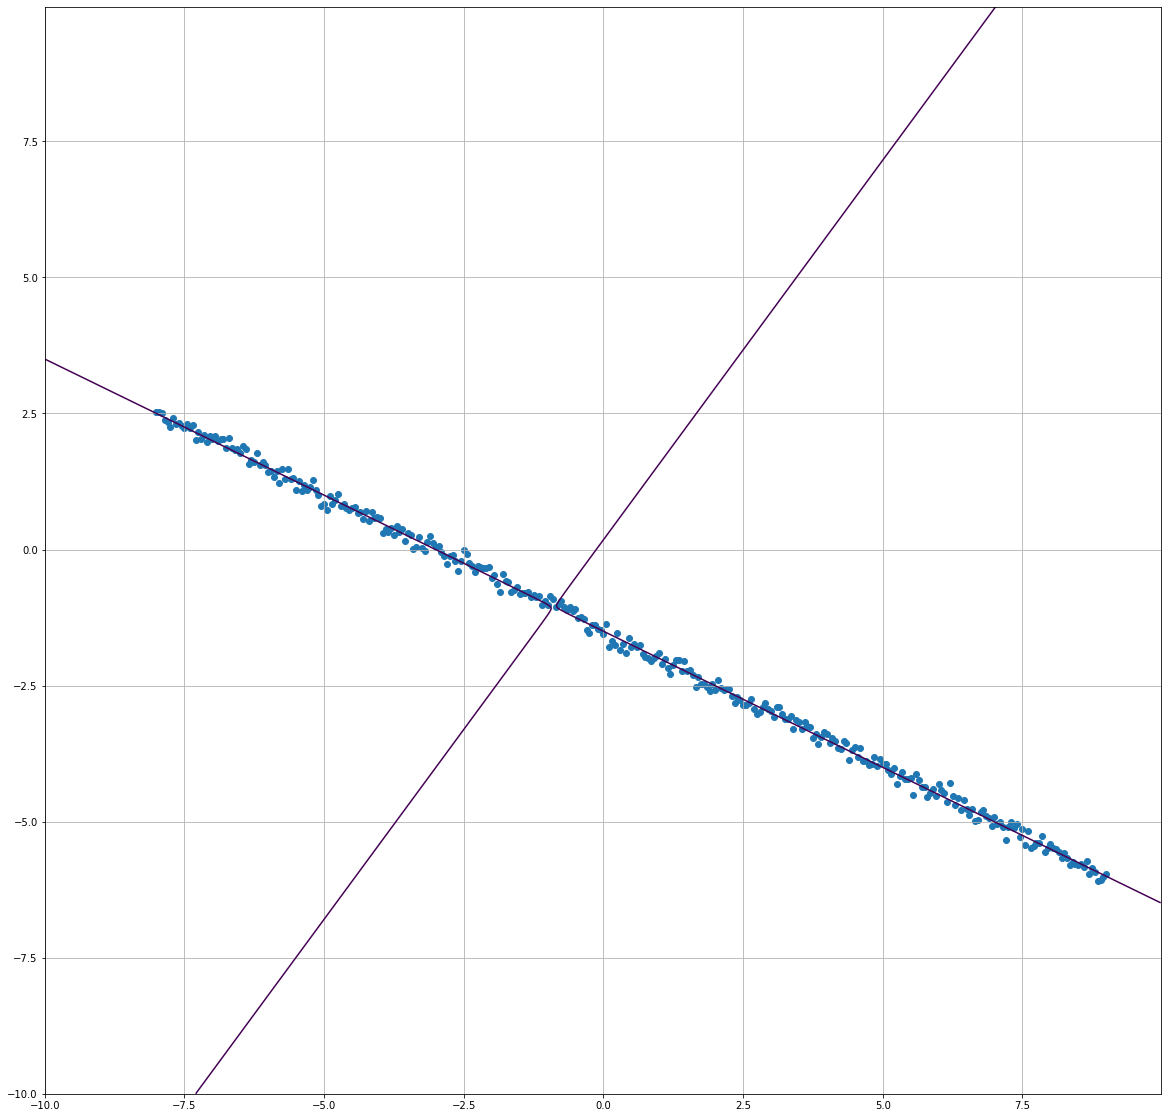

In [18]:
# line 

result_reweighted_alg_lin_method = reweighted_alg_lin_method(line_positive)
print_conic(result_reweighted_alg_lin_method, line_positive,  -10, 10, -10, 10 )

result_reweighted_alg_lin_method = reweighted_alg_lin_method(line)
print_conic(result_reweighted_alg_lin_method, line,  -10, 10, -10, 10 )